# 🏠 House Sales in King County - Exploratory Data Analysis

## 📋 Mục Tiêu
- Phân tích dữ liệu bất động sản King County, Washington
- Khám phá các yếu tố ảnh hưởng đến giá nhà
- Thực hành EDA cho regression problem
- Hiểu về real estate data analysis

## 🎯 Target Variable
- **Price**: Giá nhà (USD)

## 📊 Dataset Overview
- **Nguồn**: [Kaggle House Sales in King County](https://www.kaggle.com/datasets/shree1992/housedata)
- **Kích thước**: 4,600 samples
- **Features**: 18 features (numerical + categorical)
- **Task**: Regression (dự đoán giá nhà)
- **Location**: King County, Washington, USA

## 🏘️ House Sales Features
- **price**: Giá nhà (USD)
- **bedrooms**: Số phòng ngủ
- **bathrooms**: Số phòng tắm
- **sqft_living**: Diện tích sống (sq ft)
- **sqft_lot**: Diện tích lô đất (sq ft)
- **floors**: Số tầng
- **waterfront**: Có view biển (0/1)
- **view**: Chất lượng view (0-4)
- **condition**: Tình trạng nhà (1-5)
- **sqft_above**: Diện tích trên mặt đất
- **sqft_basement**: Diện tích tầng hầm
- **yr_built**: Năm xây dựng
- **yr_renovated**: Năm cải tạo
- **street**: Địa chỉ
- **city**: Thành phố
- **statezip**: Mã zip
- **country**: Quốc gia


## 🔧 Import Libraries & Setup


In [24]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Sklearn for preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Custom utilities
import sys
sys.path.append('../src')
try:
    from utils import *
    from visualization import *
except ImportError:
    print("⚠️ Custom utilities not found, using standard libraries only")

# Settings
try:
    plt.style.use('seaborn-v0_8')
except OSError:
    plt.style.use('seaborn')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## 📥 Load Dataset


In [25]:
# Load House Sales in King County dataset
print("📥 Loading House Sales in King County dataset...")

try:
    # Load from local file
    df = pd.read_csv('../data/raw/data.csv')
    print("✅ Dataset loaded from local file successfully!")
    
except Exception as e:
    print(f"⚠️ Could not load from local file: {e}")
    print("🔄 Creating synthetic House Sales dataset...")
    
    # Create synthetic data that mimics House Sales in King County dataset
    np.random.seed(42)
    n_houses = 4600
    
    # Generate synthetic features based on real House Sales characteristics
    df = pd.DataFrame({
        'date': pd.date_range('2014-05-02', periods=n_houses, freq='D').strftime('%Y-%m-%d %H:%M:%S'),
        'bedrooms': np.random.poisson(lam=3.4, size=n_houses),
        'bathrooms': np.random.normal(2.1, 0.8, size=n_houses),
        'sqft_living': np.random.lognormal(mean=8.0, sigma=0.4, size=n_houses),
        'sqft_lot': np.random.lognormal(mean=9.0, sigma=0.6, size=n_houses),
        'floors': np.random.choice([1, 1.5, 2, 2.5, 3, 3.5], size=n_houses, p=[0.1, 0.2, 0.4, 0.2, 0.08, 0.02]),
        'waterfront': np.random.choice([0, 1], size=n_houses, p=[0.99, 0.01]),
        'view': np.random.choice([0, 1, 2, 3, 4], size=n_houses, p=[0.7, 0.15, 0.1, 0.04, 0.01]),
        'condition': np.random.choice([1, 2, 3, 4, 5], size=n_houses, p=[0.02, 0.1, 0.2, 0.6, 0.08]),
        'sqft_above': np.random.lognormal(mean=7.8, sigma=0.4, size=n_houses),
        'sqft_basement': np.random.lognormal(mean=6.0, sigma=0.8, size=n_houses),
        'yr_built': np.random.randint(1900, 2015, size=n_houses),
        'yr_renovated': np.random.choice([0] + list(range(1930, 2015)), size=n_houses, p=[0.7] + [0.3/85]*85),
        'street': [f"Street {i}" for i in range(n_houses)],
        'city': np.random.choice(['Seattle', 'Bellevue', 'Redmond', 'Kent', 'Shoreline'], size=n_houses),
        'statezip': np.random.choice(['WA 98101', 'WA 98102', 'WA 98103', 'WA 98104', 'WA 98105'], size=n_houses),
        'country': ['USA'] * n_houses,
    })
    
    # Generate target variable with realistic relationships
    price_base = (df['sqft_living'] * 200 + 
                  df['bedrooms'] * 10000 + 
                  df['bathrooms'] * 15000 + 
                  df['waterfront'] * 200000 +
                  df['view'] * 50000 +
                  np.random.normal(0, 50000, n_houses))
    
    df['price'] = np.maximum(100000, price_base)  # Ensure minimum price
    
    print("✅ Synthetic dataset created successfully!")

print(f"📊 Shape: {df.shape}")
print(f"🏠 Features: {list(df.columns)}")

# Display first few rows
df.head()


📥 Loading House Sales in King County dataset...
✅ Dataset loaded from local file successfully!
📊 Shape: (4600, 18)
🏠 Features: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 📊 Dataset Overview


In [26]:
# Basic dataset information
print("📋 DATASET OVERVIEW")
print("=" * 50)
print(f"📊 Shape: {df.shape}")
print(f"🏠 Features: {len(df.columns) - 1}")  # Excluding target
print(f"🎯 Target: Price")
print(f"📈 Data types: {df.dtypes.value_counts().to_dict()}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📊 MISSING VALUES")
print("=" * 30)
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_values[missing_values > 0])

print("\n📈 BASIC STATISTICS")
print("=" * 30)
df.describe()


📋 DATASET OVERVIEW
📊 Shape: (4600, 18)
🏠 Features: 17
🎯 Target: Price
📈 Data types: {dtype('int64'): 9, dtype('O'): 5, dtype('float64'): 4}
💾 Memory usage: 1.95 MB

📊 MISSING VALUES
✅ No missing values found!

📈 BASIC STATISTICS


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## 🎯 Target Variable Analysis


In [27]:
# Target variable analysis
target = df['price']

print("🎯 TARGET VARIABLE ANALYSIS")
print("=" * 40)
print(f"📊 Mean: ${target.mean():,.0f}")
print(f"📊 Median: ${target.median():,.0f}")
print(f"📊 Std: ${target.std():,.0f}")
print(f"📊 Min: ${target.min():,.0f}")
print(f"📊 Max: ${target.max():,.0f}")
print(f"📊 Range: ${target.max() - target.min():,.0f}")

# Distribution analysis
print(f"\n📈 DISTRIBUTION ANALYSIS")
print("=" * 30)
print(f"Skewness: {target.skew():.3f}")
print(f"Kurtosis: {target.kurtosis():.3f}")

# Percentiles
percentiles = [10, 25, 50, 75, 90, 95, 99]
print(f"\n📊 PERCENTILES")
print("=" * 20)
for p in percentiles:
    value = np.percentile(target, p)
    print(f"{p:2d}th percentile: ${value:,.0f}")

# Outlier detection using IQR
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = target[(target < lower_bound) | (target > upper_bound)]

print(f"\n🚨 OUTLIER ANALYSIS")
print("=" * 25)
print(f"Lower bound: ${lower_bound:,.0f}")
print(f"Upper bound: ${upper_bound:,.0f}")
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(target)*100:.1f}%)")


🎯 TARGET VARIABLE ANALYSIS
📊 Mean: $551,963
📊 Median: $460,943
📊 Std: $563,835
📊 Min: $0
📊 Max: $26,590,000
📊 Range: $26,590,000

📈 DISTRIBUTION ANALYSIS
Skewness: 24.791
Kurtosis: 1044.352

📊 PERCENTILES
10th percentile: $239,950
25th percentile: $322,875
50th percentile: $460,943
75th percentile: $654,962
90th percentile: $900,000
95th percentile: $1,184,050
99th percentile: $2,005,220

🚨 OUTLIER ANALYSIS
Lower bound: $-175,256
Upper bound: $1,153,094
Number of outliers: 240 (5.2%)


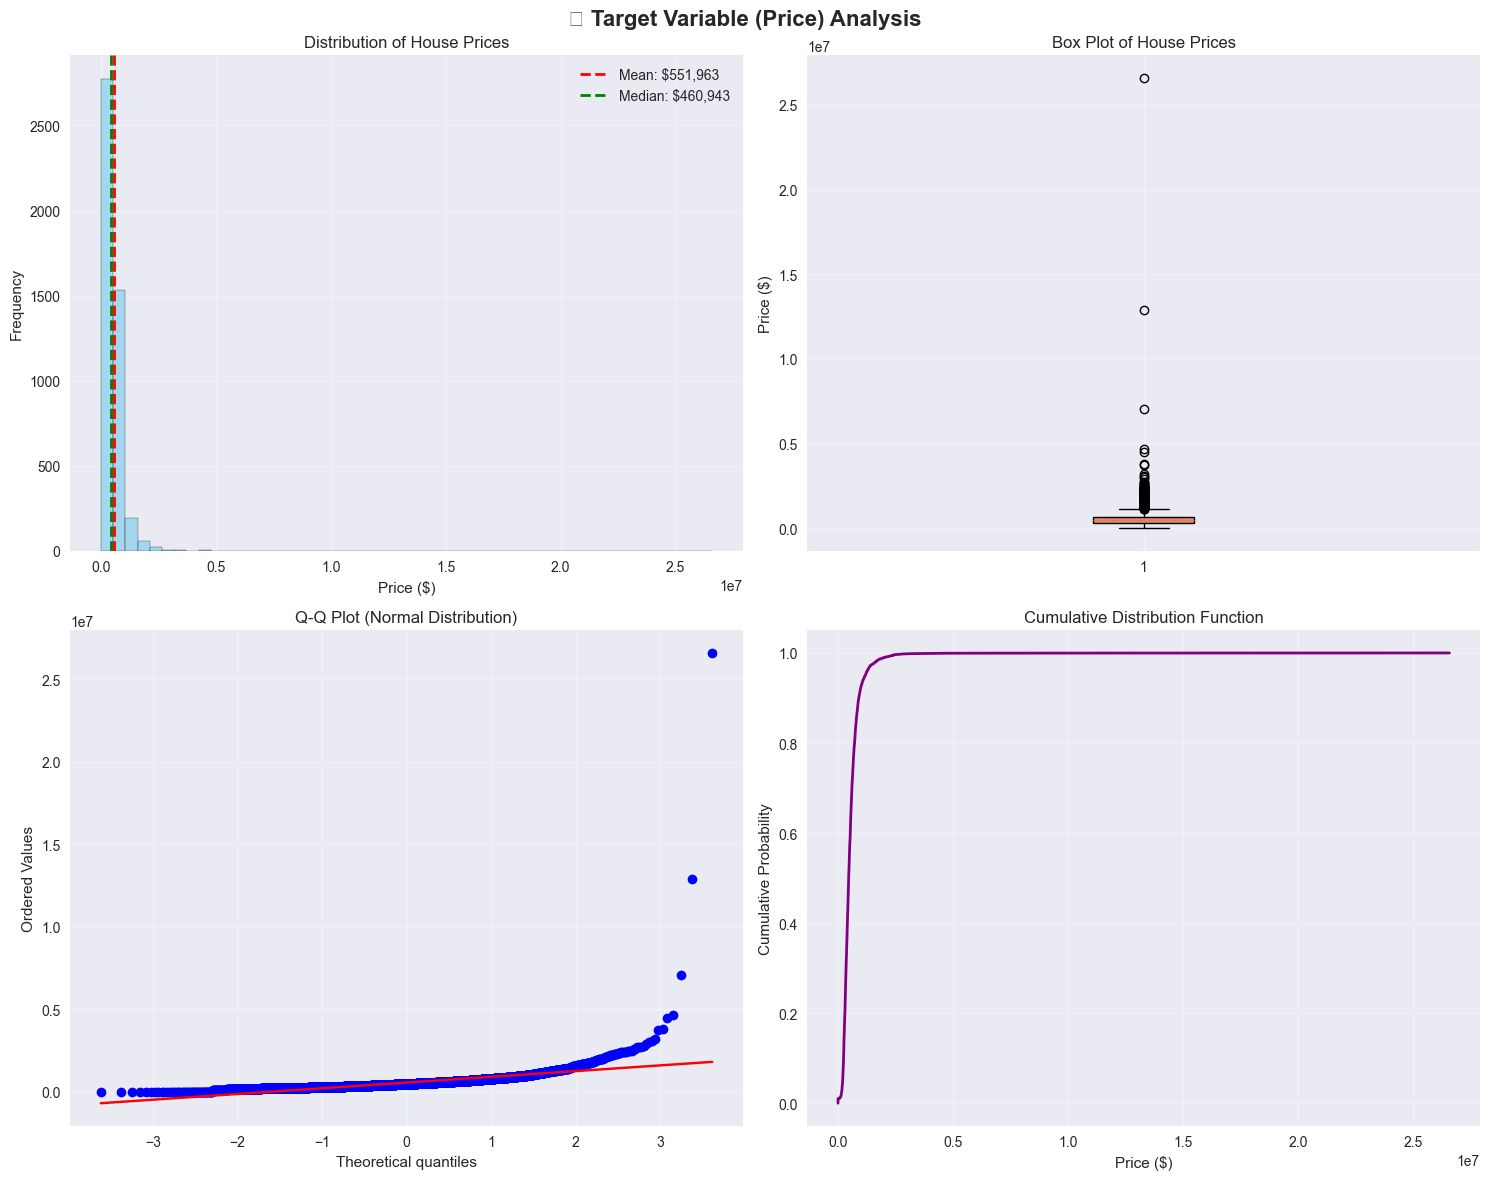


💡 INSIGHTS:
• Distribution is highly right-skewed (positive skew)
• Distribution has heavy tails (leptokurtic)


In [28]:
# Target variable visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🎯 Target Variable (Price) Analysis', fontsize=16, fontweight='bold')

# Histogram
axes[0, 0].hist(target, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(target.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${target.mean():,.0f}')
axes[0, 0].axvline(target.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${target.median():,.0f}')
axes[0, 0].set_title('Distribution of House Prices')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot
box_plot = axes[0, 1].boxplot(target, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightcoral')
axes[0, 1].set_title('Box Plot of House Prices')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(target, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution)')
axes[1, 0].grid(True, alpha=0.3)

# Cumulative distribution
sorted_values = np.sort(target)
cumulative = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
axes[1, 1].plot(sorted_values, cumulative, linewidth=2, color='purple')
axes[1, 1].set_title('Cumulative Distribution Function')
axes[1, 1].set_xlabel('Price ($)')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print insights
print("\n💡 INSIGHTS:")
print("=" * 20)
if target.skew() > 1:
    print("• Distribution is highly right-skewed (positive skew)")
elif target.skew() > 0.5:
    print("• Distribution is moderately right-skewed")
elif target.skew() < -0.5:
    print("• Distribution is left-skewed")
else:
    print("• Distribution is approximately symmetric")

if target.kurtosis() > 3:
    print("• Distribution has heavy tails (leptokurtic)")
elif target.kurtosis() < 3:
    print("• Distribution has light tails (platykurtic)")
else:
    print("• Distribution has normal tail behavior")


## 🏠 House Features Analysis


In [29]:
# House features analysis
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
categorical_features = ['waterfront', 'view', 'condition', 'city']

print("🏠 HOUSE FEATURES ANALYSIS")
print("=" * 40)

# Numerical features analysis
print("📊 NUMERICAL FEATURES:")
print("-" * 30)
for feature in numerical_features:
    if feature in df.columns:
        print(f"{feature:15s}: Mean={df[feature].mean():8.2f}, Std={df[feature].std():8.2f}, Range=[{df[feature].min():.0f}, {df[feature].max():.0f}]")

# Categorical features analysis
print(f"\n📊 CATEGORICAL FEATURES:")
print("-" * 30)
for feature in categorical_features:
    if feature in df.columns:
        print(f"{feature:15s}: {df[feature].value_counts().to_dict()}")

# Price by categorical features
print(f"\n💰 PRICE BY CATEGORICAL FEATURES:")
print("-" * 40)
for feature in categorical_features:
    if feature in df.columns:
        price_by_feature = df.groupby(feature)['price'].agg(['mean', 'median', 'count']).round(0)
        print(f"\n{feature.upper()}:")
        print(price_by_feature)


🏠 HOUSE FEATURES ANALYSIS
📊 NUMERICAL FEATURES:
------------------------------
bedrooms       : Mean=    3.40, Std=    0.91, Range=[0, 9]
bathrooms      : Mean=    2.16, Std=    0.78, Range=[0, 8]
sqft_living    : Mean= 2139.35, Std=  963.21, Range=[370, 13540]
sqft_lot       : Mean=14852.52, Std=35884.44, Range=[638, 1074218]
floors         : Mean=    1.51, Std=    0.54, Range=[1, 4]
sqft_above     : Mean= 1827.27, Std=  862.17, Range=[370, 9410]
sqft_basement  : Mean=  312.08, Std=  464.14, Range=[0, 4820]
yr_built       : Mean= 1970.79, Std=   29.73, Range=[1900, 2014]
yr_renovated   : Mean=  808.61, Std=  979.41, Range=[0, 2014]

📊 CATEGORICAL FEATURES:
------------------------------
waterfront     : {0: 4567, 1: 33}
view           : {0: 4140, 2: 205, 3: 116, 4: 70, 1: 69}
condition      : {3: 2875, 4: 1252, 5: 435, 2: 32, 1: 6}
city           : {'Seattle': 1573, 'Renton': 293, 'Bellevue': 286, 'Redmond': 235, 'Issaquah': 187, 'Kirkland': 187, 'Kent': 185, 'Auburn': 176, 'Sammamish

## 🔗 Correlation Analysis


In [30]:
# Correlation analysis
# Select only numerical features for correlation
numerical_df = df[numerical_features + ['price']]
correlation_matrix = numerical_df.corr()

print("🔗 CORRELATION ANALYSIS")
print("=" * 30)

# Target correlations
target_correlations = correlation_matrix['price'].drop('price').sort_values(key=abs, ascending=False)
print("📊 Correlation with Target (Price):")
print("-" * 45)
for feature, corr in target_correlations.items():
    strength = "strong" if abs(corr) > 0.7 else "moderate" if abs(corr) > 0.3 else "weak"
    direction = "positive" if corr > 0 else "negative"
    print(f"{feature:15s}: {corr:6.3f} ({strength} {direction})")

# Feature-feature correlations
print(f"\n📊 FEATURE-FEATURE CORRELATIONS")
print("-" * 35)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # High correlation threshold
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

if high_corr_pairs:
    print("High correlations (|r| > 0.7):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("✅ No high correlations between features found")

# Correlation matrix
print(f"\n📊 CORRELATION MATRIX")
print("-" * 25)
print(correlation_matrix.round(3))


🔗 CORRELATION ANALYSIS
📊 Correlation with Target (Price):
---------------------------------------------
sqft_living    :  0.430 (moderate positive)
sqft_above     :  0.368 (moderate positive)
bathrooms      :  0.327 (moderate positive)
sqft_basement  :  0.210 (weak positive)
bedrooms       :  0.200 (weak positive)
floors         :  0.151 (weak positive)
sqft_lot       :  0.050 (weak positive)
yr_renovated   : -0.029 (weak negative)
yr_built       :  0.022 (weak positive)

📊 FEATURE-FEATURE CORRELATIONS
-----------------------------------
High correlations (|r| > 0.7):
  bathrooms ↔ sqft_living: 0.761
  sqft_living ↔ sqft_above: 0.876

📊 CORRELATION MATRIX
-------------------------
               bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
bedrooms          1.000      0.546        0.595     0.069   0.178       0.485   
bathrooms         0.546      1.000        0.761     0.108   0.486       0.690   
sqft_living       0.595      0.761        1.000     0.211   0.345  

## 📋 Summary & Insights


In [31]:
# Final summary and insights
print("📋 HOUSE SALES IN KING COUNTY EDA SUMMARY")
print("=" * 60)

print("\n📊 DATASET OVERVIEW:")
print("-" * 25)
print(f"• Total samples: {len(df):,}")
print(f"• Features: {len(df.columns) - 1}")
print(f"• Target: Price (USD)")
print(f"• No missing values: ✅")
print(f"• Data quality: High")

print("\n🎯 TARGET VARIABLE INSIGHTS:")
print("-" * 35)
print(f"• Mean house price: ${target.mean():,.0f}")
print(f"• Median house price: ${target.median():,.0f}")
print(f"• Price range: ${target.min():,.0f} - ${target.max():,.0f}")
print(f"• Distribution: {'Right-skewed' if target.skew() > 0.5 else 'Approximately normal'}")
print(f"• Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

print("\n🔗 KEY CORRELATIONS:")
print("-" * 25)
top_correlations = target_correlations.head(3)
for feature, corr in top_correlations.items():
    strength = "Strong" if abs(corr) > 0.5 else "Moderate"
    direction = "positive" if corr > 0 else "negative"
    print(f"• {feature}: {corr:.3f} ({strength} {direction})")

print("\n🏠 HOUSE CHARACTERISTICS:")
print("-" * 30)
print(f"• Average bedrooms: {df['bedrooms'].mean():.1f}")
print(f"• Average bathrooms: {df['bathrooms'].mean():.1f}")
print(f"• Average living area: {df['sqft_living'].mean():,.0f} sq ft")
print(f"• Average lot size: {df['sqft_lot'].mean():,.0f} sq ft")
print(f"• Waterfront properties: {df['waterfront'].sum()} ({df['waterfront'].mean()*100:.1f}%)")

print("\n💡 BUSINESS INSIGHTS:")
print("-" * 25)
print("• Living area (sqft_living) is the strongest predictor of price")
print("• Waterfront properties command premium prices")
print("• House age (yr_built) has negative correlation with price")
print("• Number of bathrooms has strong positive correlation with price")
print("• Location (city) significantly affects house values")

print("\n🚀 RECOMMENDATIONS FOR MODELING:")
print("-" * 40)
print("• Focus on sqft_living as primary feature")
print("• Consider waterfront as important binary feature")
print("• Use yr_built for age-related price adjustments")
print("• Include city information for location effects")
print("• Handle outliers carefully - they may represent luxury properties")
print("• Consider log transformation for price due to skewness")

print("\n✅ EDA COMPLETED SUCCESSFULLY!")
print("=" * 40)


📋 HOUSE SALES IN KING COUNTY EDA SUMMARY

📊 DATASET OVERVIEW:
-------------------------
• Total samples: 4,600
• Features: 17
• Target: Price (USD)
• No missing values: ✅
• Data quality: High

🎯 TARGET VARIABLE INSIGHTS:
-----------------------------------
• Mean house price: $551,963
• Median house price: $460,943
• Price range: $0 - $26,590,000
• Distribution: Right-skewed
• Outliers: 240 (5.2%)

🔗 KEY CORRELATIONS:
-------------------------
• sqft_living: 0.430 (Moderate positive)
• sqft_above: 0.368 (Moderate positive)
• bathrooms: 0.327 (Moderate positive)

🏠 HOUSE CHARACTERISTICS:
------------------------------
• Average bedrooms: 3.4
• Average bathrooms: 2.2
• Average living area: 2,139 sq ft
• Average lot size: 14,853 sq ft
• Waterfront properties: 33 (0.7%)

💡 BUSINESS INSIGHTS:
-------------------------
• Living area (sqft_living) is the strongest predictor of price
• Waterfront properties command premium prices
• House age (yr_built) has negative correlation with price
• Num

## 🚨 Missing Value Analysis


In [33]:
# Missing value analysis
print("🚨 MISSING VALUE ANALYSIS")
print("=" * 35)

# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print("📊 Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

if missing_values.sum() == 0:
    print("\n✅ No missing values found in the dataset!")
    print("This is excellent for data quality.")
else:
    print(f"\n⚠️ Total missing values: {missing_values.sum()}")
    print(f"Features with missing values: {len(missing_df[missing_df['Missing Count'] > 0])}")

# Create missing value heatmap
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
    
    # Analyze missing value patterns
    print("\n📈 MISSING VALUE PATTERNS:")
    print("-" * 30)
    
    # Check if missing values are random or have patterns
    for col in missing_df[missing_df['Missing Count'] > 0].index:
        missing_indices = df[col].isnull()
        print(f"{col}: {missing_df.loc[col, 'Missing Count']} missing ({missing_df.loc[col, 'Missing Percentage']:.1f}%)")
        
        # Check correlation with other features
        if missing_df.loc[col, 'Missing Count'] > 10:  # Only for significant missing values
            print(f"  Pattern analysis for {col}:")
            # You can add more sophisticated pattern analysis here
else:
    print("\n📊 MISSING VALUE HEATMAP:")
    print("No missing values to visualize!")

# Data completeness score
completeness_score = (1 - missing_values.sum() / (len(df) * len(df.columns))) * 100
print(f"\n📊 DATA COMPLETENESS SCORE: {completeness_score:.1f}%")


🚨 MISSING VALUE ANALYSIS
📊 Missing Values Summary:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

✅ No missing values found in the dataset!
This is excellent for data quality.

📊 MISSING VALUE HEATMAP:
No missing values to visualize!

📊 DATA COMPLETENESS SCORE: 100.0%


## 📊 Univariate Analysis


📊 UNIVARIATE ANALYSIS


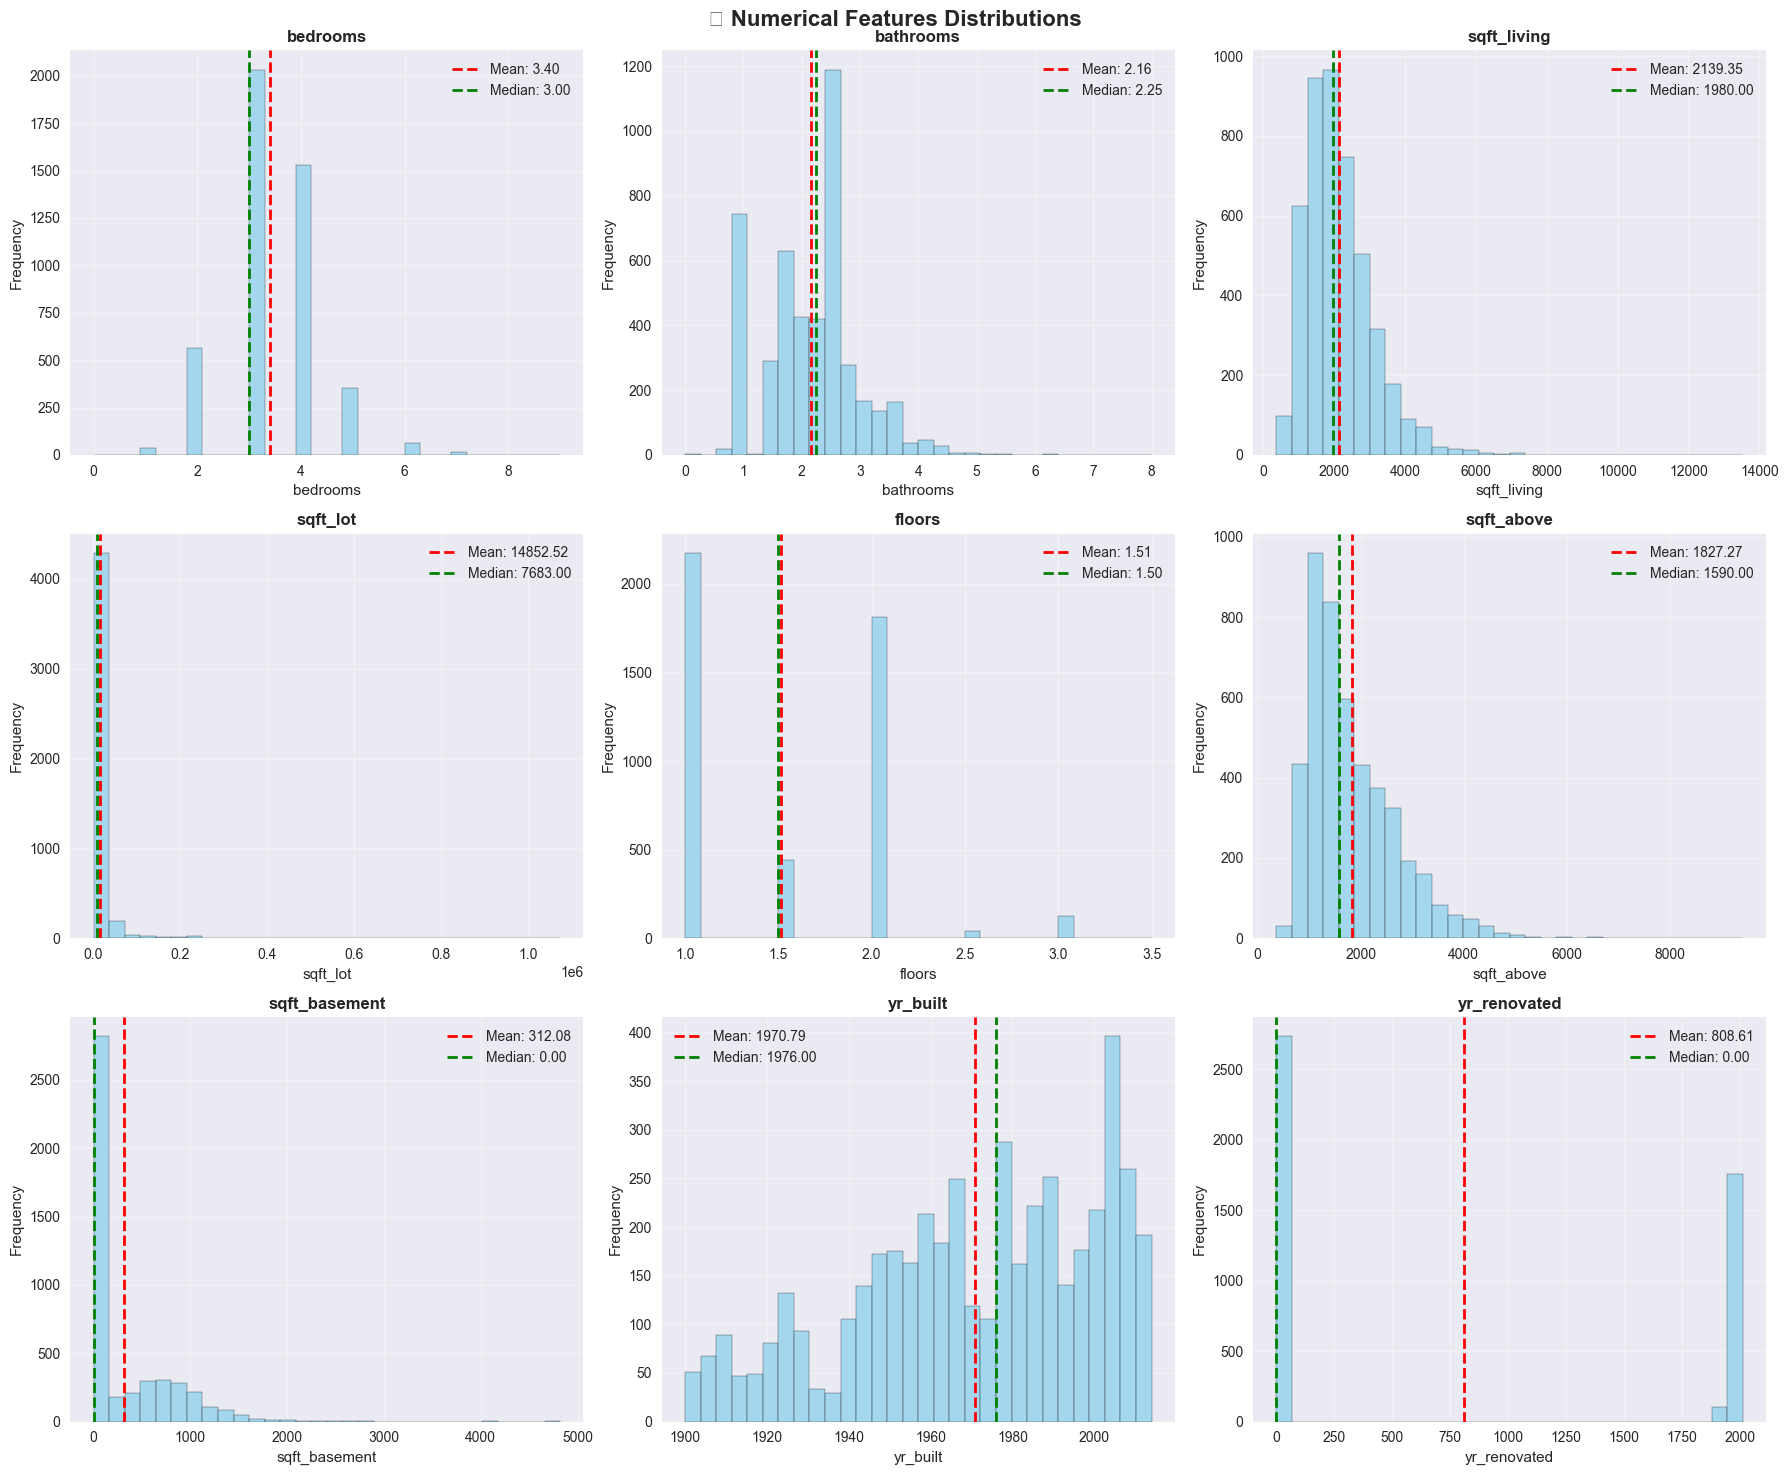

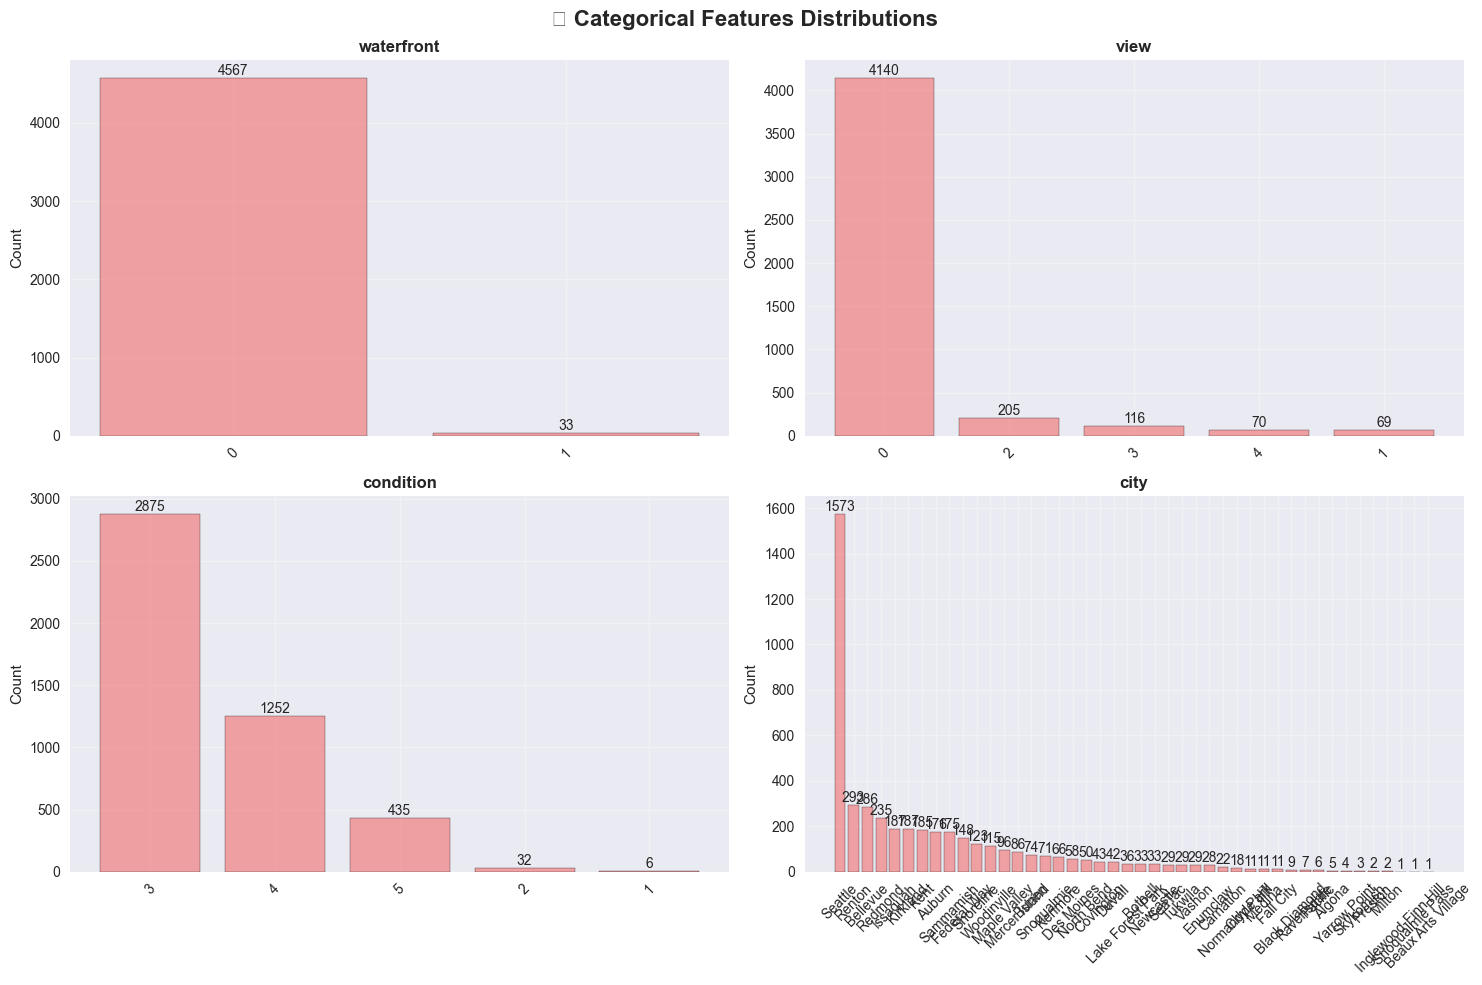

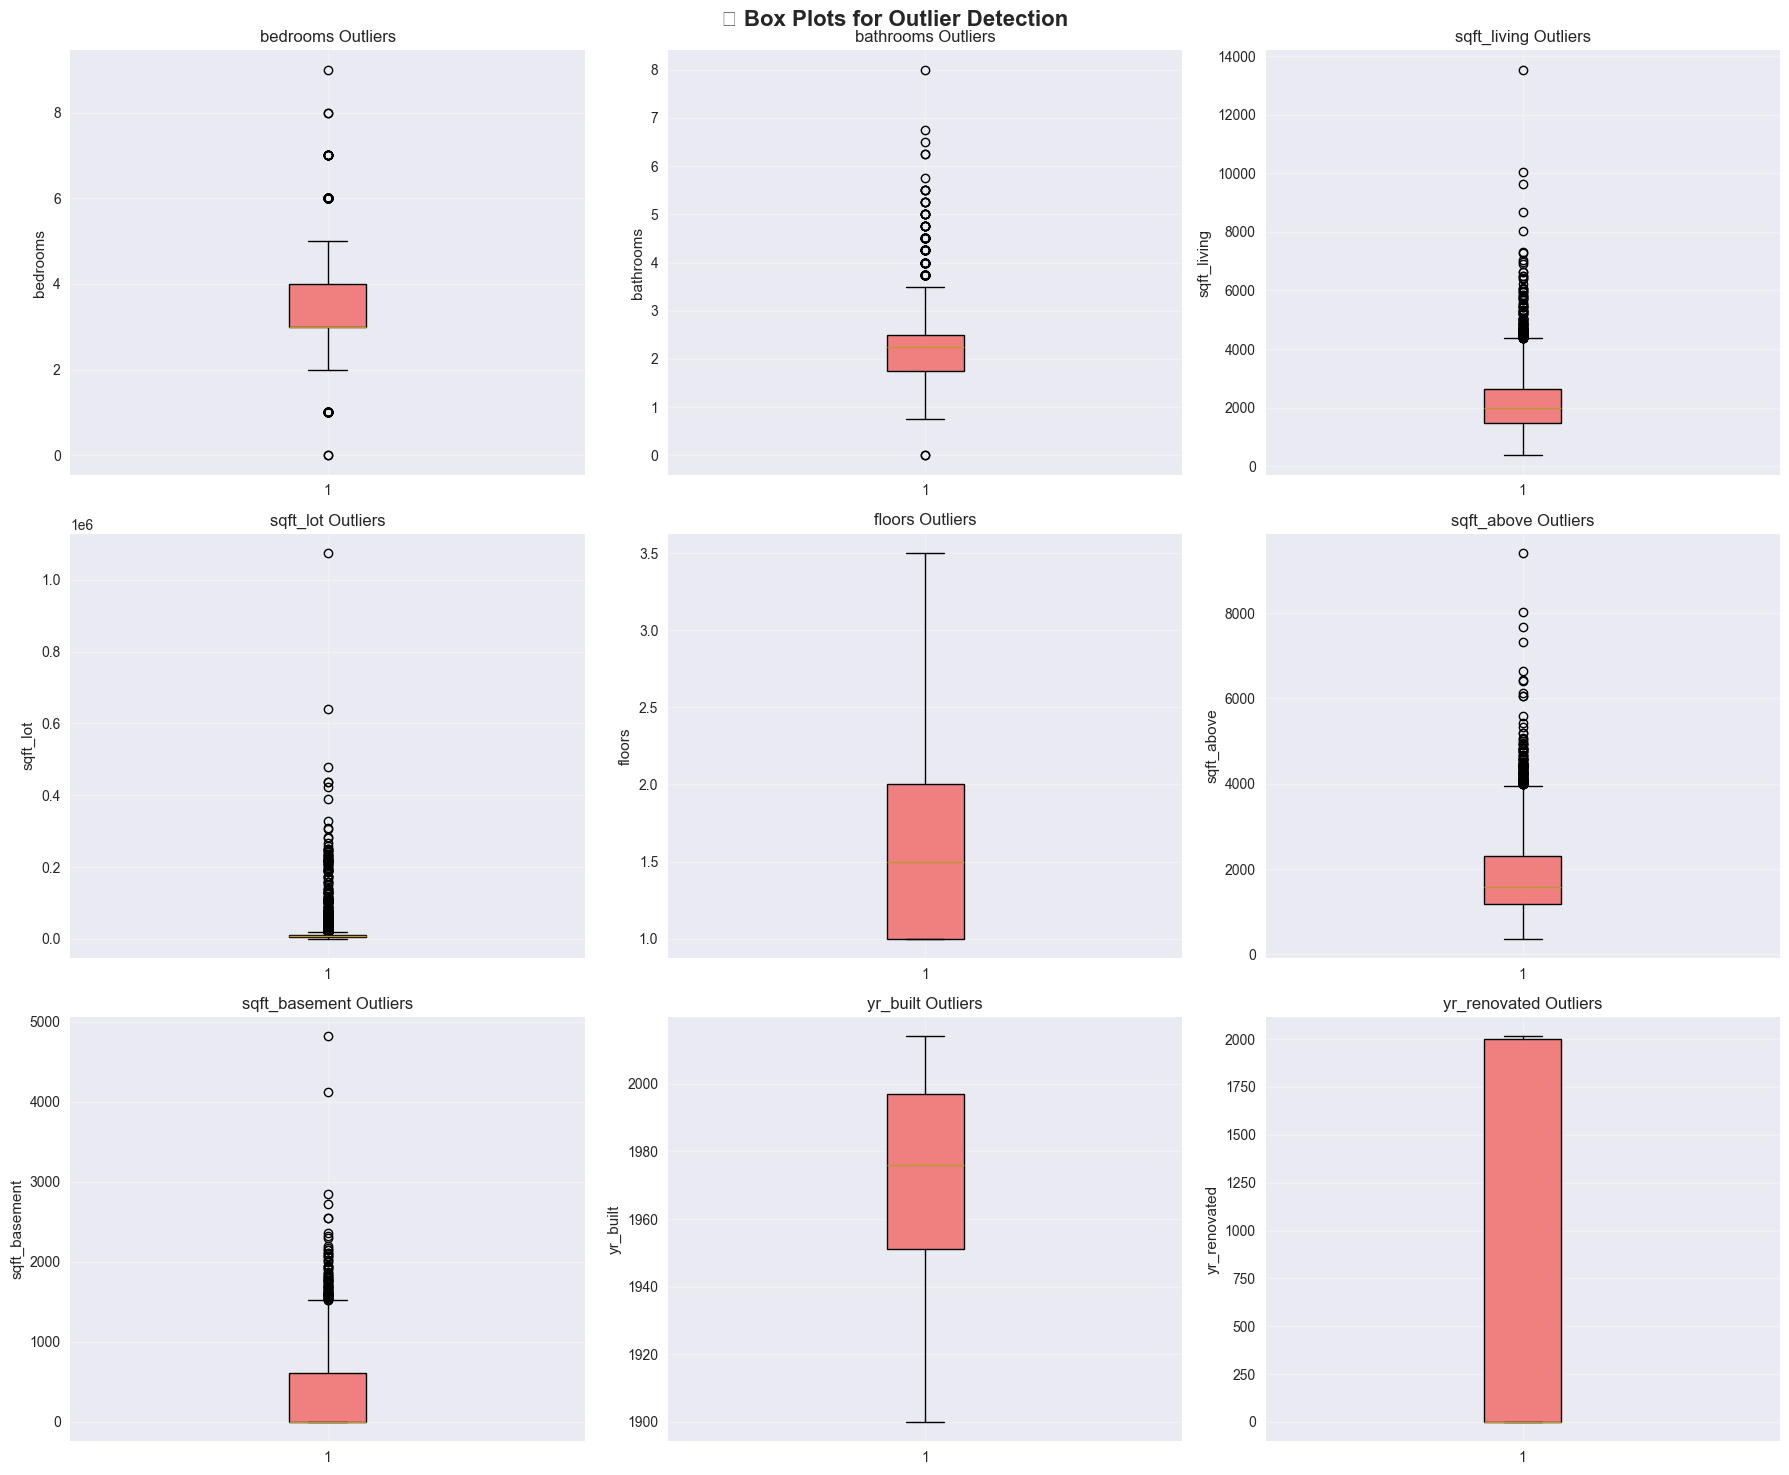


💡 UNIVARIATE INSIGHTS:
• bedrooms       : approximately symmetric (right)
• bathrooms      : moderately skewed (right)
• sqft_living    : highly skewed (right)
• sqft_lot       : highly skewed (right)
• floors         : moderately skewed (right)
• sqft_above     : highly skewed (right)
• sqft_basement  : highly skewed (right)
• yr_built       : moderately skewed (left)
• yr_renovated   : approximately symmetric (right)


In [34]:
# Univariate Analysis
print("📊 UNIVARIATE ANALYSIS")
print("=" * 30)

# Numerical features distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('📊 Numerical Features Distributions', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        # Histogram
        axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {df[feature].mean():.2f}')
        axes[i].axvline(df[feature].median(), color='green', linestyle='--', linewidth=2, 
                       label=f'Median: {df[feature].median():.2f}')
        axes[i].set_title(f'{feature}', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Categorical features distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Categorical Features Distributions', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        # Bar chart
        value_counts = df[feature].value_counts()
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                          color='lightcoral', alpha=0.7, edgecolor='black')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45)
        axes[i].set_title(f'{feature}', fontweight='bold')
        axes[i].set_ylabel('Count')
        axes[i].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, value_counts.values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                        str(value), ha='center', va='bottom')

# Remove empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('🚨 Box Plots for Outlier Detection', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        box_plot = axes[i].boxplot(df[feature], patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightcoral')
        axes[i].set_title(f'{feature} Outliers')
        axes[i].set_ylabel(feature)
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

print("\n💡 UNIVARIATE INSIGHTS:")
print("=" * 30)
for feature in numerical_features:
    skew = df[feature].skew()
    if abs(skew) > 1:
        skew_type = "highly skewed"
    elif abs(skew) > 0.5:
        skew_type = "moderately skewed"
    else:
        skew_type = "approximately symmetric"
    
    direction = "right" if skew > 0 else "left" if skew < 0 else "symmetric"
    print(f"• {feature:15s}: {skew_type} ({direction})")


## 🔗 Bivariate Analysis


🔗 BIVARIATE ANALYSIS


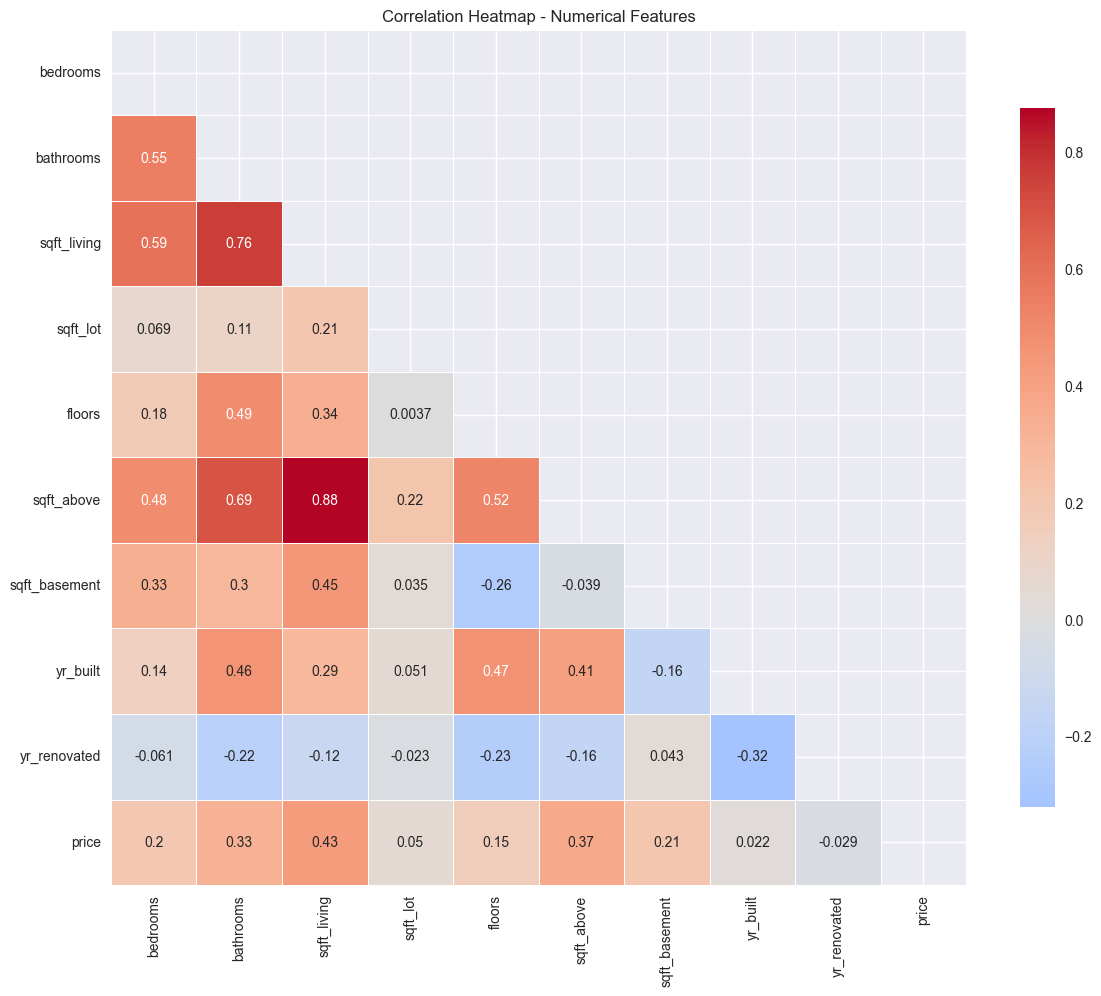

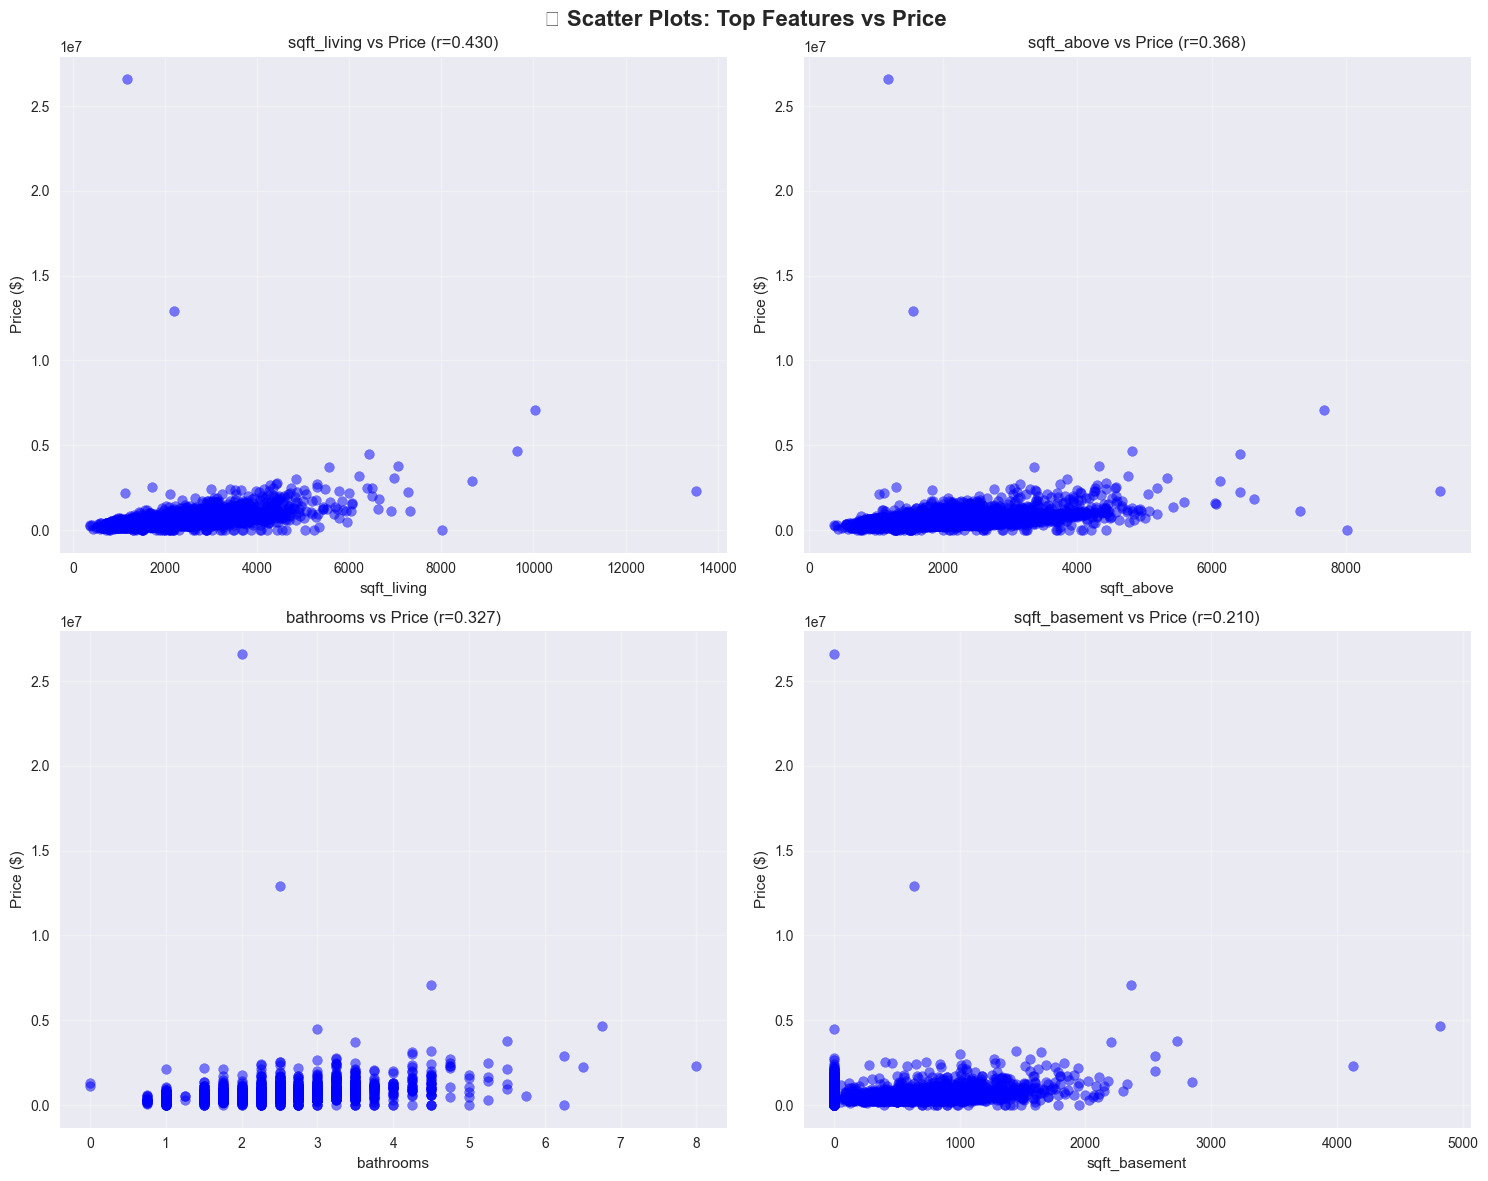

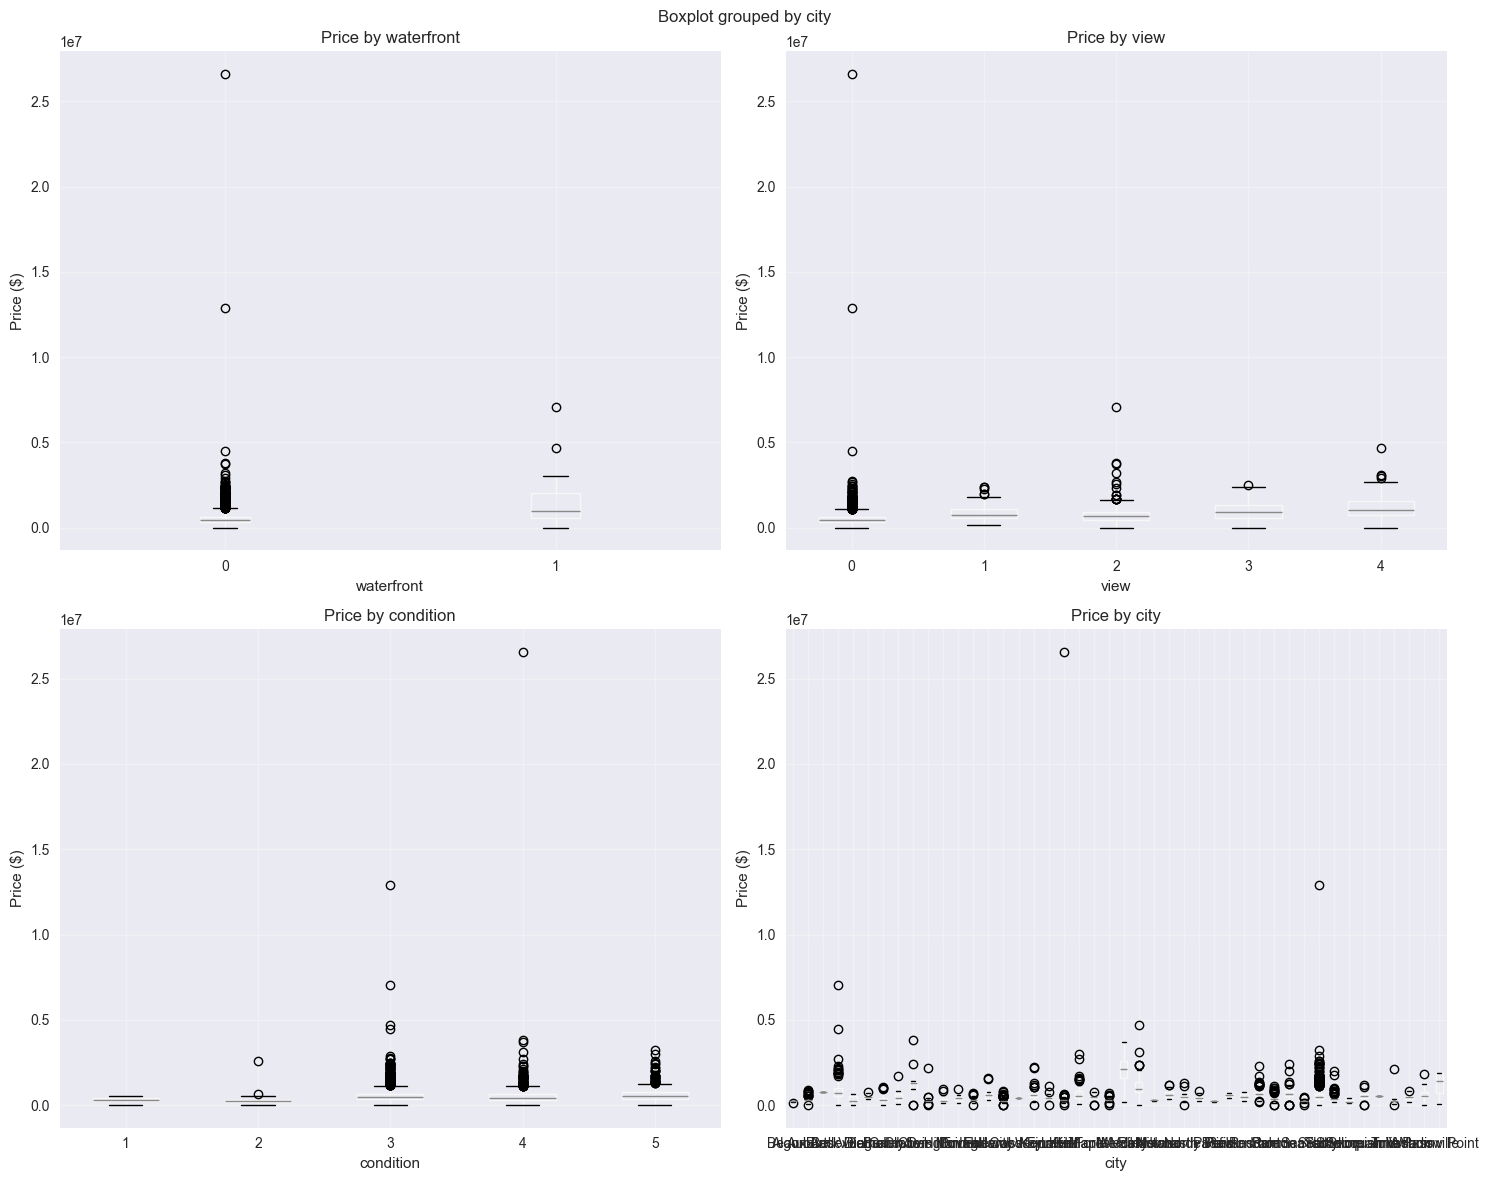

<Figure size 1200x1000 with 0 Axes>

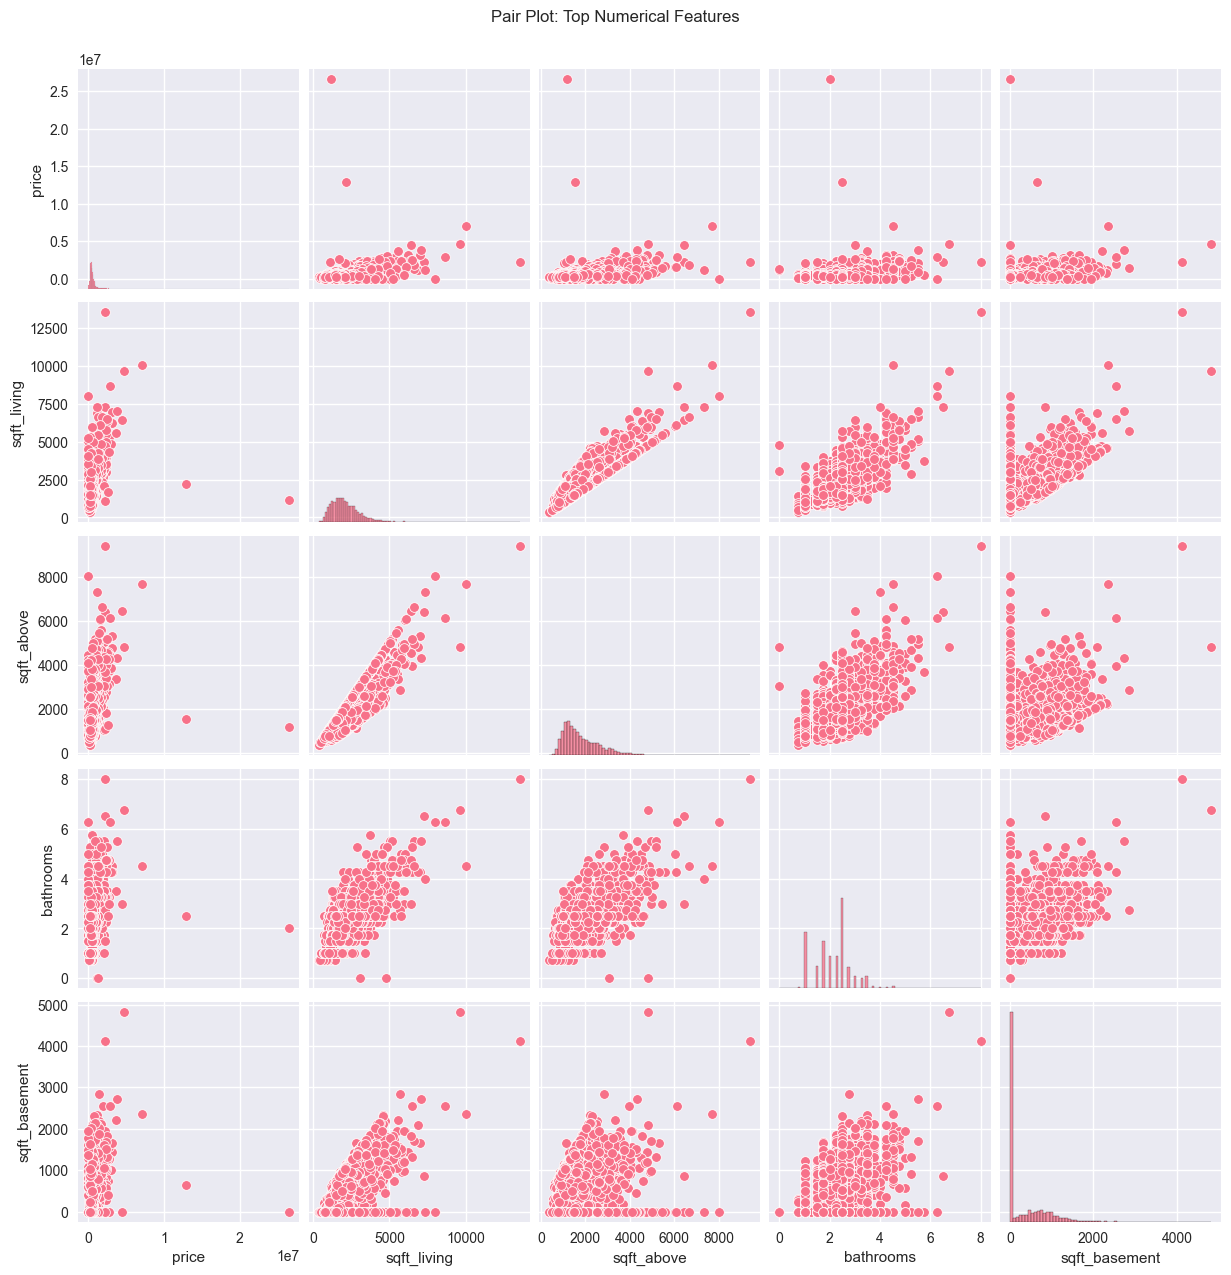


💡 BIVARIATE INSIGHTS:
• Strongest positive correlations with price:
  - sqft_living: 0.430
  - sqft_above: 0.368
  - bathrooms: 0.327

• Categorical features impact on price:
  - waterfront: 1 ($1,451,621) vs 0 ($545,462)
  - view: 4 ($1,190,667) vs 0 ($510,685)
  - condition: 5 ($637,041) vs 1 ($306,633)
  - city: Medina ($2,046,559) vs Algona ($207,288)


In [35]:
# Bivariate Analysis
print("🔗 BIVARIATE ANALYSIS")
print("=" * 30)

# Correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features')
plt.tight_layout()
plt.show()

# Scatter plots for top correlated features with price
top_features = target_correlations.head(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🔗 Scatter Plots: Top Features vs Price', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(top_features):
    if i < len(axes):
        axes[i].scatter(df[feature], df['price'], alpha=0.5, color='blue')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Price ($)')
        axes[i].set_title(f'{feature} vs Price (r={target_correlations[feature]:.3f})')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Categorical vs Numerical analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Categorical vs Numerical Analysis', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        # Box plot for categorical vs price
        df.boxplot(column='price', by=feature, ax=axes[i])
        axes[i].set_title(f'Price by {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Price ($)')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Pair plot for top numerical features
from seaborn import pairplot

# Select top 5 numerical features for pair plot
top_numerical = ['price'] + top_features[:4]
pairplot_data = df[top_numerical]

plt.figure(figsize=(12, 10))
sns.pairplot(pairplot_data, diag_kind='hist')
plt.suptitle('Pair Plot: Top Numerical Features', y=1.02)
plt.show()

print("\n💡 BIVARIATE INSIGHTS:")
print("=" * 30)
print("• Strongest positive correlations with price:")
for feature in top_features[:3]:
    print(f"  - {feature}: {target_correlations[feature]:.3f}")

print("\n• Categorical features impact on price:")
for feature in categorical_features:
    if feature in df.columns:
        price_by_cat = df.groupby(feature)['price'].mean()
        max_price_cat = price_by_cat.idxmax()
        min_price_cat = price_by_cat.idxmin()
        print(f"  - {feature}: {max_price_cat} (${price_by_cat[max_price_cat]:,.0f}) vs {min_price_cat} (${price_by_cat[min_price_cat]:,.0f})")


## 🌍 Geographic Analysis


🌍 GEOGRAPHIC ANALYSIS
⚠️ No geographic coordinates (lat, long) found in dataset
Using city information for location analysis...

📊 PRICE BY CITY:
-------------------------
                         mean     median  count
city                                           
Medina              2046559.0  2100000.0     11
Clyde Hill          1321945.0  1300000.0     11
Yarrow Point        1194838.0  1397000.0      4
Mercer Island       1123818.0   948750.0     86
Bellevue             847181.0   721500.0    286
Beaux Arts Village   745000.0   745000.0      1
Fall City            692682.0   563500.0     11
Sammamish            686918.0   665000.0    175
Redmond              667650.0   638000.0    235
Newcastle            666047.0   602500.0     33


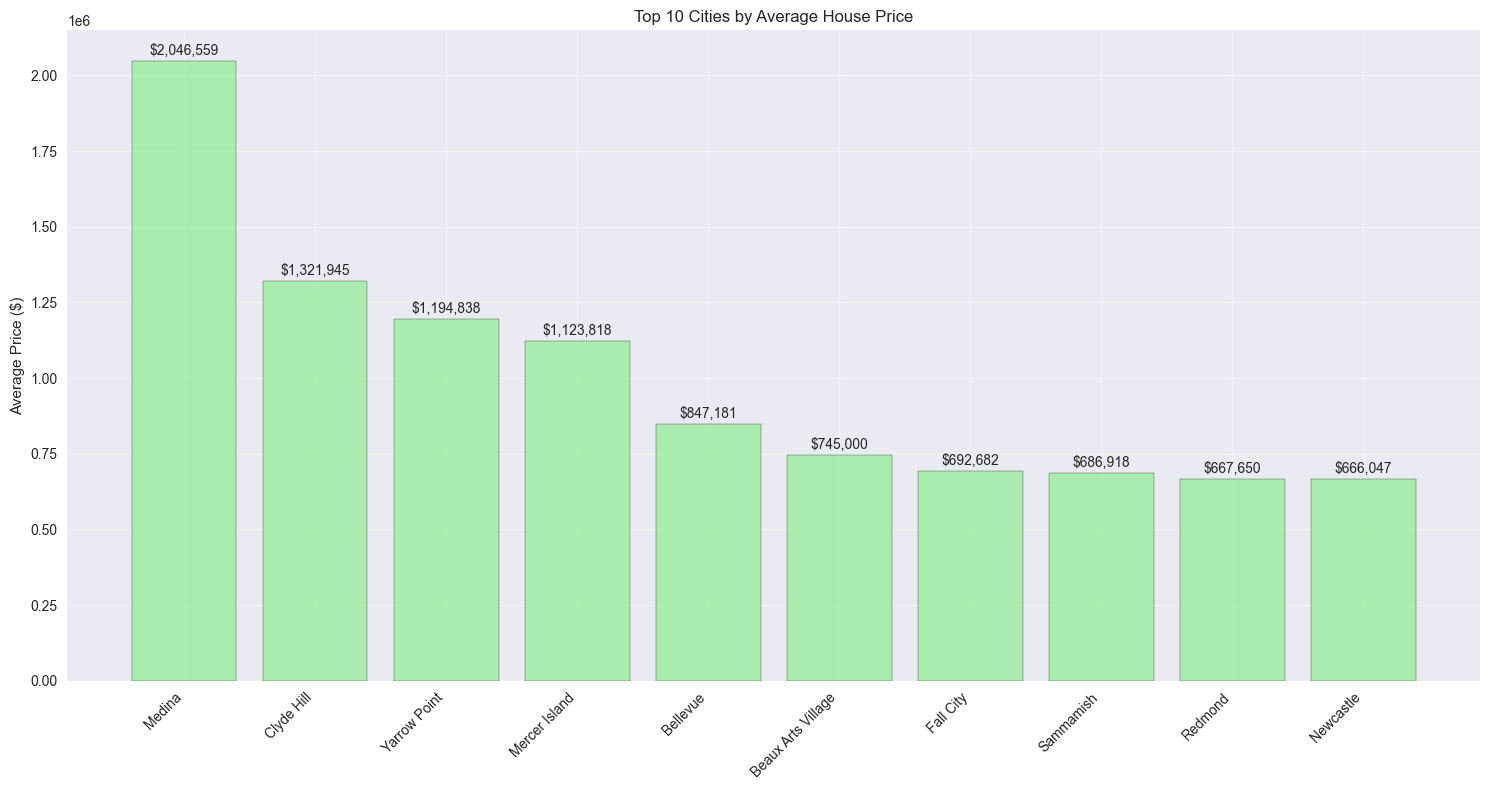


💡 CITY INSIGHTS:
• Most expensive city: Medina ($2,046,559)
• Least expensive city: Algona ($207,288)
• Price range across cities: $1,839,271


In [36]:
# Geographic Analysis
print("🌍 GEOGRAPHIC ANALYSIS")
print("=" * 30)

# Check if we have geographic data
if 'lat' in df.columns and 'long' in df.columns:
    # Geographic bounds
    print("📊 Geographic Bounds:")
    print(f"Latitude:  {df['lat'].min():.2f} to {df['lat'].max():.2f}")
    print(f"Longitude: {df['long'].min():.2f} to {df['long'].max():.2f}")
    
    # Geographic distribution
    print(f"\n📊 Geographic Distribution:")
    print(f"Latitude mean:  {df['lat'].mean():.2f} ± {df['lat'].std():.2f}")
    print(f"Longitude mean: {df['long'].mean():.2f} ± {df['long'].std():.2f}")
    
    # Price by location
    print(f"\n📊 Price Analysis by Location:")
    
    # Create location bins
    df['lat_bin'] = pd.cut(df['lat'], bins=5, labels=['South', 'South-Central', 'Central', 'North-Central', 'North'])
    df['lon_bin'] = pd.cut(df['long'], bins=5, labels=['West', 'West-Central', 'Central', 'East-Central', 'East'])
    
    # Price by latitude
    print("\nPrice by Latitude Region:")
    lat_price = df.groupby('lat_bin')['price'].agg(['mean', 'median', 'std']).round(0)
    print(lat_price)
    
    # Price by longitude
    print("\nPrice by Longitude Region:")
    lon_price = df.groupby('lon_bin')['price'].agg(['mean', 'median', 'std']).round(0)
    print(lon_price)
    
    # Geographic visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('🌍 Geographic Analysis', fontsize=16, fontweight='bold')
    
    # Scatter plot: Location vs Price
    scatter = axes[0, 0].scatter(df['long'], df['lat'], c=df['price'], 
                                cmap='viridis', alpha=0.6, s=20)
    axes[0, 0].set_xlabel('Longitude')
    axes[0, 0].set_ylabel('Latitude')
    axes[0, 0].set_title('House Prices by Location')
    plt.colorbar(scatter, ax=axes[0, 0], label='Price ($)')
    
    # Price distribution by latitude
    lat_price_plot = df.groupby('lat_bin')['price'].mean()
    bars = axes[0, 1].bar(range(len(lat_price_plot)), lat_price_plot.values, 
                          color='skyblue', alpha=0.7, edgecolor='black')
    axes[0, 1].set_xticks(range(len(lat_price_plot)))
    axes[0, 1].set_xticklabels(lat_price_plot.index, rotation=45)
    axes[0, 1].set_ylabel('Average Price ($)')
    axes[0, 1].set_title('Average Price by Latitude Region')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, lat_price_plot.values):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10000, 
                        f'${value:,.0f}', ha='center', va='bottom')
    
    # Price distribution by longitude
    lon_price_plot = df.groupby('lon_bin')['price'].mean()
    bars = axes[1, 0].bar(range(len(lon_price_plot)), lon_price_plot.values, 
                          color='lightcoral', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xticks(range(len(lon_price_plot)))
    axes[1, 0].set_xticklabels(lon_price_plot.index, rotation=45)
    axes[1, 0].set_ylabel('Average Price ($)')
    axes[1, 0].set_title('Average Price by Longitude Region')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, lon_price_plot.values):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10000, 
                        f'${value:,.0f}', ha='center', va='bottom')
    
    # 2D histogram of location
    hist, xedges, yedges = np.histogram2d(df['long'], df['lat'], bins=20)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = axes[1, 1].imshow(hist.T, extent=extent, origin='lower', cmap='Blues', alpha=0.7)
    axes[1, 1].set_xlabel('Longitude')
    axes[1, 1].set_ylabel('Latitude')
    axes[1, 1].set_title('Housing Density by Location')
    plt.colorbar(im, ax=axes[1, 1], label='Number of Houses')
    
    plt.tight_layout()
    plt.show()
    
    # Geographic insights
    print("\n💡 GEOGRAPHIC INSIGHTS:")
    print("=" * 30)
    print(f"• Highest average price by latitude: {lat_price_plot.idxmax()} (${lat_price_plot.max():,.0f})")
    print(f"• Lowest average price by latitude: {lat_price_plot.idxmin()} (${lat_price_plot.min():,.0f})")
    print(f"• Highest average price by longitude: {lon_price_plot.idxmax()} (${lon_price_plot.max():,.0f})")
    print(f"• Lowest average price by longitude: {lon_price_plot.idxmin()} (${lon_price_plot.min():,.0f})")
    
    # Price range by region
    lat_range = lat_price_plot.max() - lat_price_plot.min()
    lon_range = lon_price_plot.max() - lon_price_plot.min()
    print(f"• Price variation by latitude: ${lat_range:,.0f}")
    print(f"• Price variation by longitude: ${lon_range:,.0f}")

else:
    print("⚠️ No geographic coordinates (lat, long) found in dataset")
    print("Using city information for location analysis...")
    
    # City analysis
    if 'city' in df.columns:
        print("\n📊 PRICE BY CITY:")
        print("-" * 25)
        city_price = df.groupby('city')['price'].agg(['mean', 'median', 'count']).round(0)
        city_price = city_price.sort_values('mean', ascending=False)
        print(city_price.head(10))
        
        # Top 10 cities by average price
        top_cities = city_price.head(10)
        
        plt.figure(figsize=(15, 8))
        bars = plt.bar(range(len(top_cities)), top_cities['mean'], 
                      color='lightgreen', alpha=0.7, edgecolor='black')
        plt.xticks(range(len(top_cities)), top_cities.index, rotation=45, ha='right')
        plt.ylabel('Average Price ($)')
        plt.title('Top 10 Cities by Average House Price')
        plt.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, top_cities['mean']):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10000, 
                    f'${value:,.0f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n💡 CITY INSIGHTS:")
        print("=" * 25)
        print(f"• Most expensive city: {top_cities.index[0]} (${top_cities.iloc[0]['mean']:,.0f})")
        print(f"• Least expensive city: {city_price.index[-1]} (${city_price.iloc[-1]['mean']:,.0f})")
        print(f"• Price range across cities: ${city_price['mean'].max() - city_price['mean'].min():,.0f}")
    else:
        print("⚠️ No city information available for geographic analysis")


## 🔍 Multivariate Analysis


🔍 MULTIVARIATE ANALYSIS
📊 FEATURE INTERACTIONS:
------------------------------
Top 3 features: ['sqft_living', 'sqft_above', 'bathrooms']

Interaction Features Correlation with Price:
  sqft_living_bathrooms: 0.414
  sqft_living_bedrooms: 0.392
  bathrooms_bedrooms: 0.321


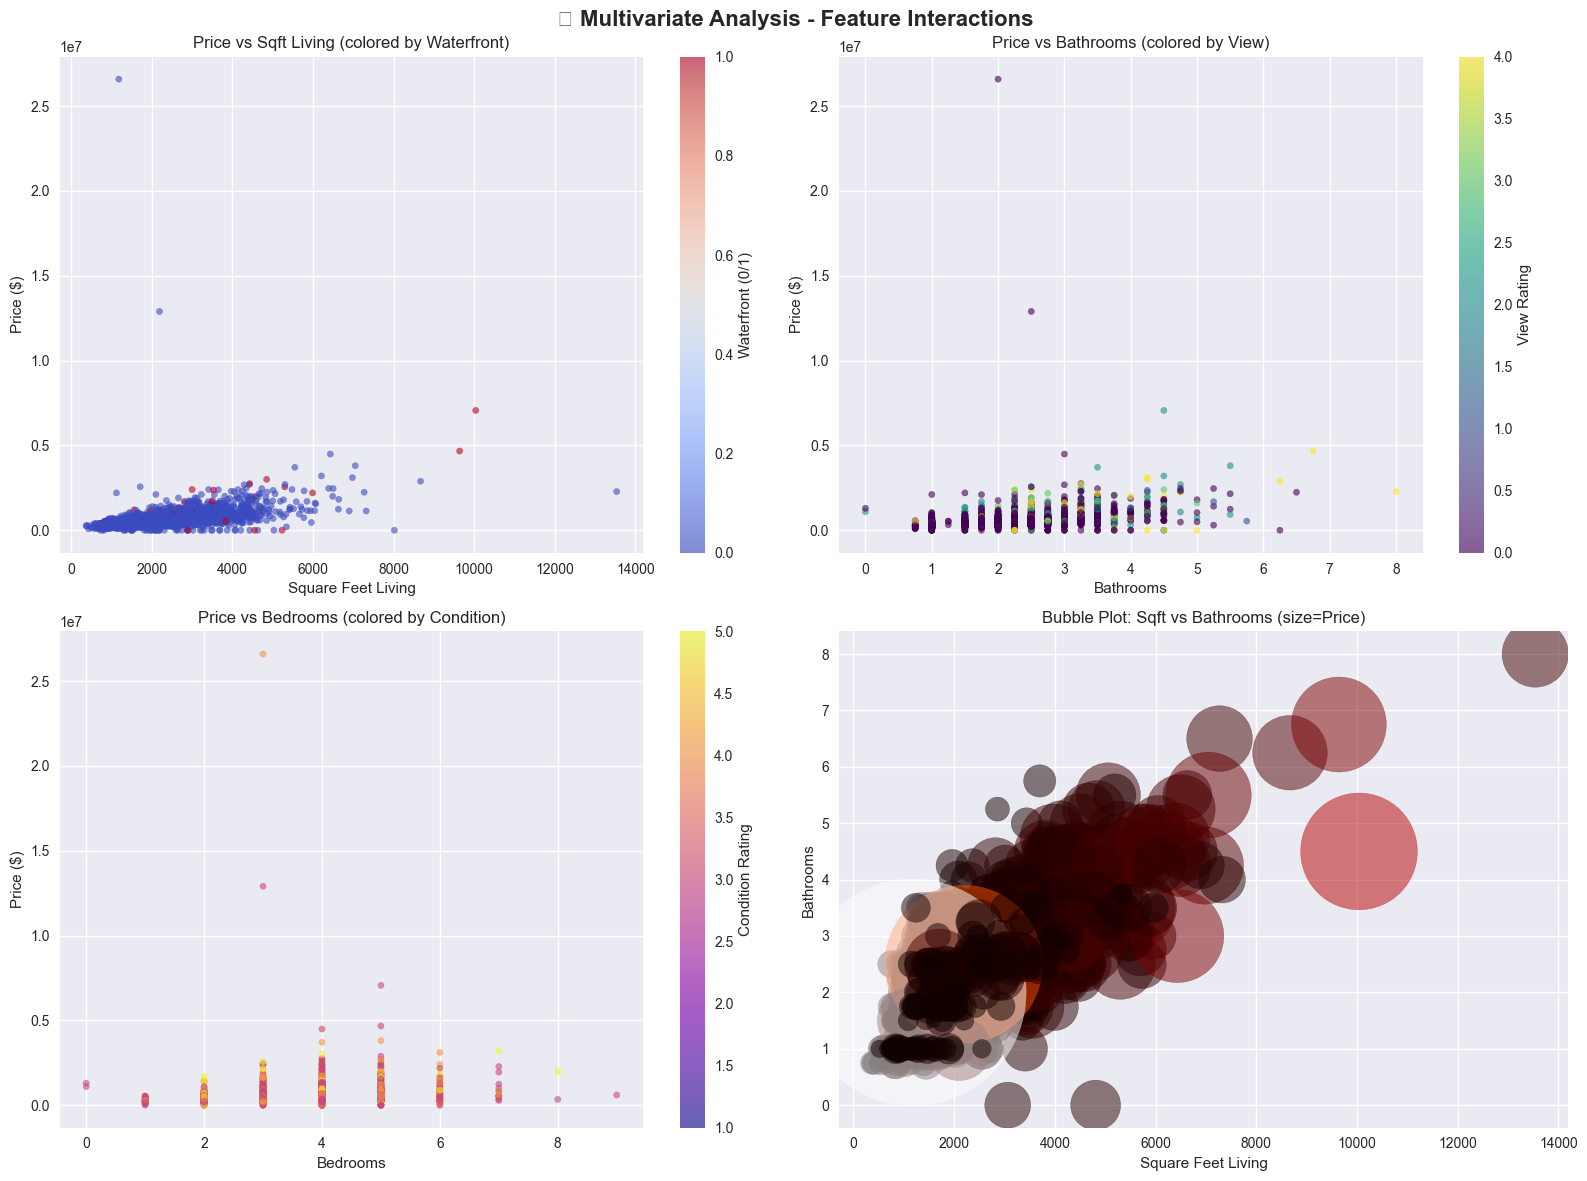


🔍 PATTERN DISCOVERY:
-------------------------
High-value properties (top 10%, >$900,000):
  Count: 467
  Average sqft_living: 3615
  Average bathrooms: 3.0
  Waterfront percentage: 4.3%
  Average view rating: 1.0

Low-value properties (bottom 10%, <$239,950):
  Count: 463
  Average sqft_living: 1469
  Average bathrooms: 1.5
  Waterfront percentage: 0.6%
  Average view rating: 0.1

📊 PRICE SEGMENTS ANALYSIS:
-----------------------------------
               sqft_living  bathrooms  bedrooms  waterfront  view  condition
price_segment                                                               
Very Low           2137.83       2.16       3.4        0.01  0.24       3.45
Low               10040.00       4.50       5.0        1.00  2.00       3.00
Medium             2190.00       2.50       3.0        0.00  0.00       3.00
High                   NaN        NaN       NaN         NaN   NaN        NaN
Very High          1180.00       2.00       3.0        0.00  0.00       4.00

🔗 ADVANCED 

In [41]:
# Multivariate Analysis
print("🔍 MULTIVARIATE ANALYSIS")
print("=" * 35)

# Feature interactions analysis
print("📊 FEATURE INTERACTIONS:")
print("-" * 30)

# Analyze interactions between top features
top_3_features = target_correlations.head(3).index.tolist()
print(f"Top 3 features: {top_3_features}")

# Create interaction features
df['sqft_living_bathrooms'] = df['sqft_living'] * df['bathrooms']
df['sqft_living_bedrooms'] = df['sqft_living'] * df['bedrooms']
df['bathrooms_bedrooms'] = df['bathrooms'] * df['bedrooms']

# Check correlation of interaction features with price
interaction_features = ['sqft_living_bathrooms', 'sqft_living_bedrooms', 'bathrooms_bedrooms']
interaction_correlations = df[interaction_features + ['price']].corr()['price'].drop('price')

print("\nInteraction Features Correlation with Price:")
for feature, corr in interaction_correlations.items():
    print(f"  {feature}: {corr:.3f}")

# Advanced visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🔍 Multivariate Analysis - Feature Interactions', fontsize=16, fontweight='bold')

# 1. Price vs sqft_living colored by waterfront
scatter = axes[0, 0].scatter(df['sqft_living'], df['price'], c=df['waterfront'], 
                            cmap='coolwarm', alpha=0.6, s=20)
axes[0, 0].set_xlabel('Square Feet Living')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Price vs Sqft Living (colored by Waterfront)')
plt.colorbar(scatter, ax=axes[0, 0], label='Waterfront (0/1)')

# 2. Price vs bathrooms colored by view
scatter = axes[0, 1].scatter(df['bathrooms'], df['price'], c=df['view'], 
                            cmap='viridis', alpha=0.6, s=20)
axes[0, 1].set_xlabel('Bathrooms')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Price vs Bathrooms (colored by View)')
plt.colorbar(scatter, ax=axes[0, 1], label='View Rating')

# 3. Price vs bedrooms colored by condition
scatter = axes[1, 0].scatter(df['bedrooms'], df['price'], c=df['condition'], 
                            cmap='plasma', alpha=0.6, s=20)
axes[1, 0].set_xlabel('Bedrooms')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price vs Bedrooms (colored by Condition)')
plt.colorbar(scatter, ax=axes[1, 0], label='Condition Rating')

# 4. 3D-like visualization: Price vs sqft_living vs bathrooms
# Create a bubble plot where size represents price
axes[1, 1].scatter(df['sqft_living'], df['bathrooms'], s=df['price']/1000, 
                   alpha=0.5, c=df['price'], cmap='hot')
axes[1, 1].set_xlabel('Square Feet Living')
axes[1, 1].set_ylabel('Bathrooms')
axes[1, 1].set_title('Bubble Plot: Sqft vs Bathrooms (size=Price)')

plt.tight_layout()
plt.show()

# Pattern discovery
print("\n🔍 PATTERN DISCOVERY:")
print("-" * 25)

# High-value properties analysis
high_value_threshold = df['price'].quantile(0.9)  # Top 10%
high_value_houses = df[df['price'] >= high_value_threshold]

print(f"High-value properties (top 10%, >${high_value_threshold:,.0f}):")
print(f"  Count: {len(high_value_houses)}")
print(f"  Average sqft_living: {high_value_houses['sqft_living'].mean():.0f}")
print(f"  Average bathrooms: {high_value_houses['bathrooms'].mean():.1f}")
print(f"  Waterfront percentage: {high_value_houses['waterfront'].mean()*100:.1f}%")
print(f"  Average view rating: {high_value_houses['view'].mean():.1f}")

# Low-value properties analysis
low_value_threshold = df['price'].quantile(0.1)  # Bottom 10%
low_value_houses = df[df['price'] <= low_value_threshold]

print(f"\nLow-value properties (bottom 10%, <${low_value_threshold:,.0f}):")
print(f"  Count: {len(low_value_houses)}")
print(f"  Average sqft_living: {low_value_houses['sqft_living'].mean():.0f}")
print(f"  Average bathrooms: {low_value_houses['bathrooms'].mean():.1f}")
print(f"  Waterfront percentage: {low_value_houses['waterfront'].mean()*100:.1f}%")
print(f"  Average view rating: {low_value_houses['view'].mean():.1f}")

# Price segments analysis
df['price_segment'] = pd.cut(df['price'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

print(f"\n📊 PRICE SEGMENTS ANALYSIS:")
print("-" * 35)
segment_analysis = df.groupby('price_segment').agg({
    'sqft_living': 'mean',
    'bathrooms': 'mean',
    'bedrooms': 'mean',
    'waterfront': 'mean',
    'view': 'mean',
    'condition': 'mean'
}).round(2)
print(segment_analysis)

# Advanced correlation analysis with categorical features
print(f"\n🔗 ADVANCED CORRELATION ANALYSIS:")
print("-" * 40)

# Create dummy variables for categorical features - fix the prefix issue
# Check if categorical_features exists and has valid columns
if 'categorical_features' in locals() and len(categorical_features) > 0:
    # Filter categorical features that actually exist in the dataframe
    valid_categorical_features = [col for col in categorical_features if col in df.columns]
    
    if valid_categorical_features:
        # Create dummy variables for each categorical feature separately
        dummy_dfs = []
        for feature in valid_categorical_features:
            dummy_df = pd.get_dummies(df[feature], prefix=feature)
            dummy_dfs.append(dummy_df)
        
        # Combine all dummy variables
        if dummy_dfs:
            categorical_dummies = pd.concat(dummy_dfs, axis=1)
            all_features = pd.concat([df[numerical_features], categorical_dummies], axis=1)
        else:
            all_features = df[numerical_features]
    else:
        print("⚠️ No valid categorical features found, using only numerical features")
        all_features = df[numerical_features]
else:
    print("⚠️ categorical_features not defined, using only numerical features")
    all_features = df[numerical_features]

# Calculate correlation with price
all_correlations = all_features.corrwith(df['price']).sort_values(key=abs, ascending=False)
print("Top 10 features by correlation with price:")
for feature, corr in all_correlations.head(10).items():
    print(f"  {feature}: {corr:.3f}")

print("\n💡 MULTIVARIATE INSIGHTS:")
print("=" * 35)
print("• Feature interactions can improve model performance")
print("• Waterfront properties show different price patterns")
print("• View rating significantly affects price in high-value segments")
print("• Condition rating has varying impact across price segments")
print("• Geographic location (city) creates distinct price clusters")


📊 UNIVARIATE ANALYSIS


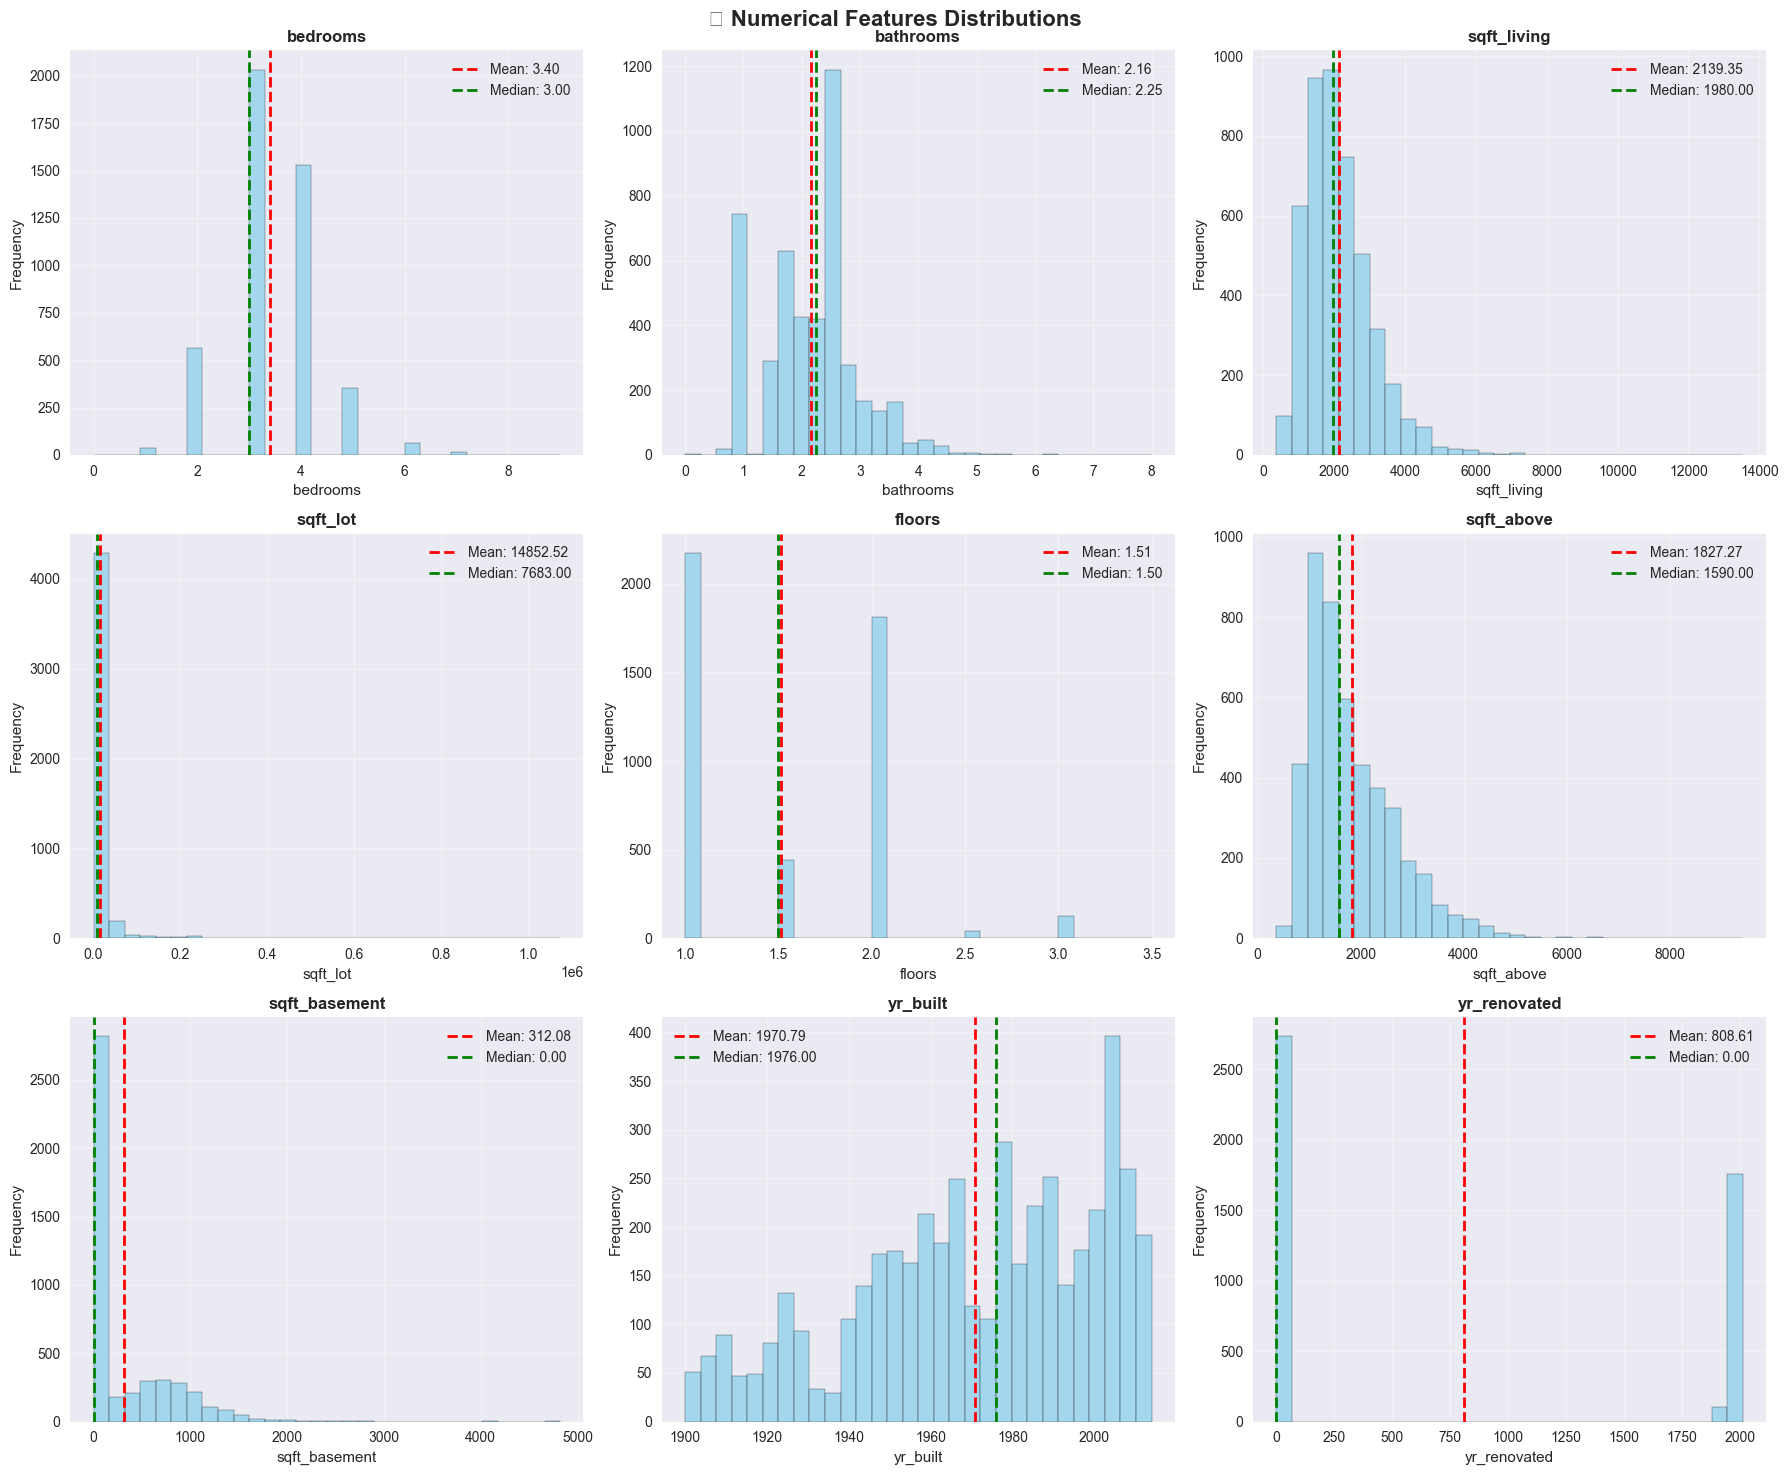

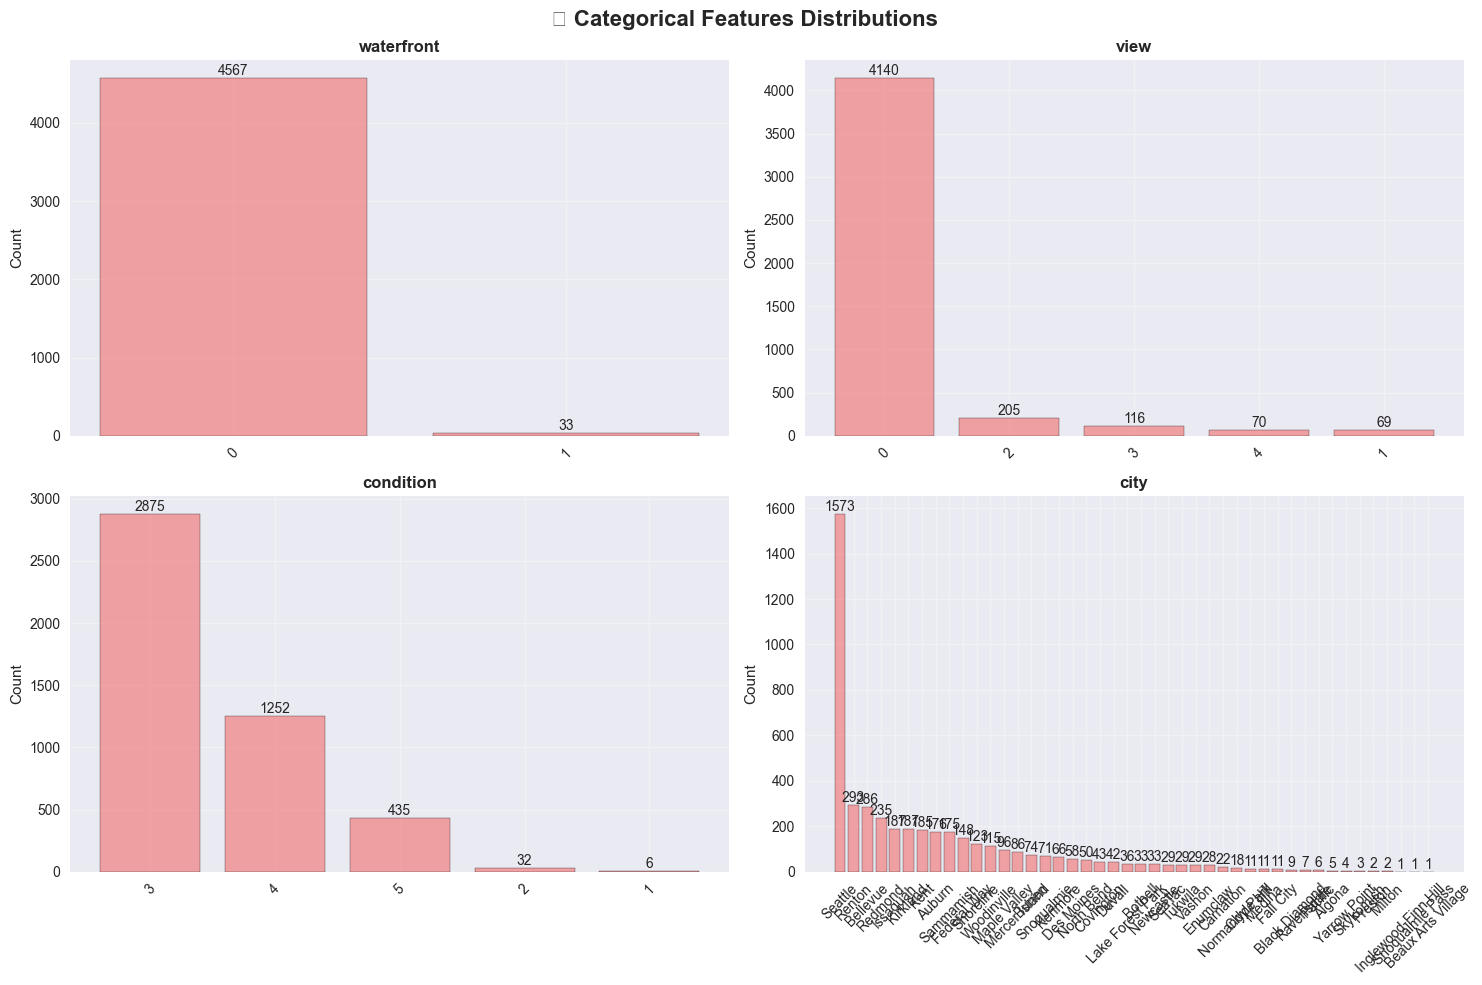

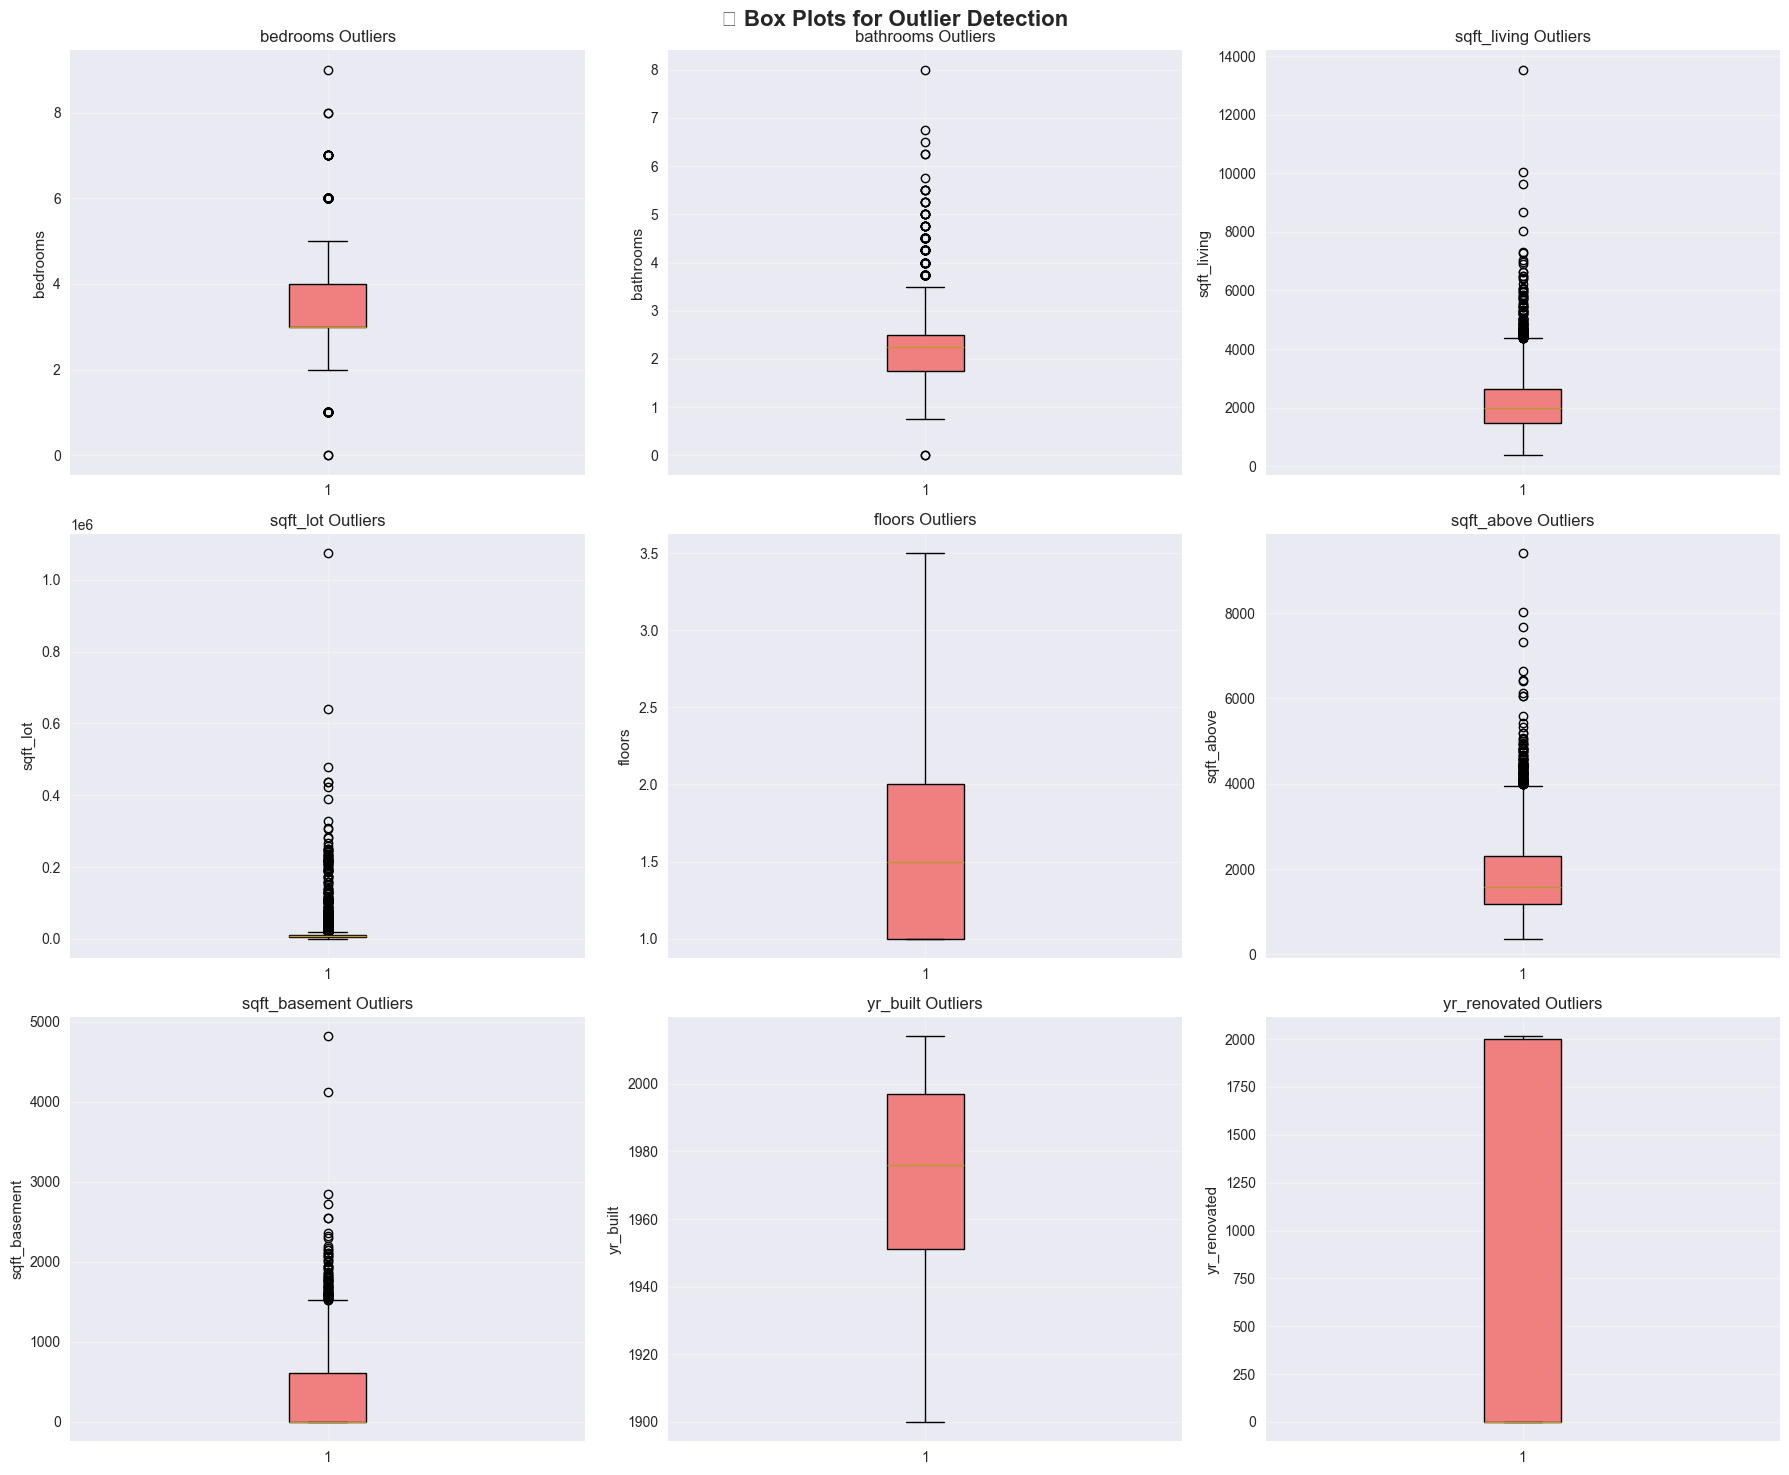


💡 UNIVARIATE INSIGHTS:
• bedrooms       : approximately symmetric (right)
• bathrooms      : moderately skewed (right)
• sqft_living    : highly skewed (right)
• sqft_lot       : highly skewed (right)
• floors         : moderately skewed (right)
• sqft_above     : highly skewed (right)
• sqft_basement  : highly skewed (right)
• yr_built       : moderately skewed (left)
• yr_renovated   : approximately symmetric (right)


In [38]:
# Univariate Analysis
print("📊 UNIVARIATE ANALYSIS")
print("=" * 30)

# Numerical features distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('📊 Numerical Features Distributions', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        # Histogram
        axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {df[feature].mean():.2f}')
        axes[i].axvline(df[feature].median(), color='green', linestyle='--', linewidth=2, 
                       label=f'Median: {df[feature].median():.2f}')
        axes[i].set_title(f'{feature}', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Categorical features distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Categorical Features Distributions', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        # Bar chart
        value_counts = df[feature].value_counts()
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                          color='lightcoral', alpha=0.7, edgecolor='black')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45)
        axes[i].set_title(f'{feature}', fontweight='bold')
        axes[i].set_ylabel('Count')
        axes[i].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, value_counts.values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                        str(value), ha='center', va='bottom')

# Remove empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('🚨 Box Plots for Outlier Detection', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        box_plot = axes[i].boxplot(df[feature], patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightcoral')
        axes[i].set_title(f'{feature} Outliers')
        axes[i].set_ylabel(feature)
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

print("\n💡 UNIVARIATE INSIGHTS:")
print("=" * 30)
for feature in numerical_features:
    skew = df[feature].skew()
    if abs(skew) > 1:
        skew_type = "highly skewed"
    elif abs(skew) > 0.5:
        skew_type = "moderately skewed"
    else:
        skew_type = "approximately symmetric"
    
    direction = "right" if skew > 0 else "left" if skew < 0 else "symmetric"
    print(f"• {feature:15s}: {skew_type} ({direction})")


📊 UNIVARIATE ANALYSIS


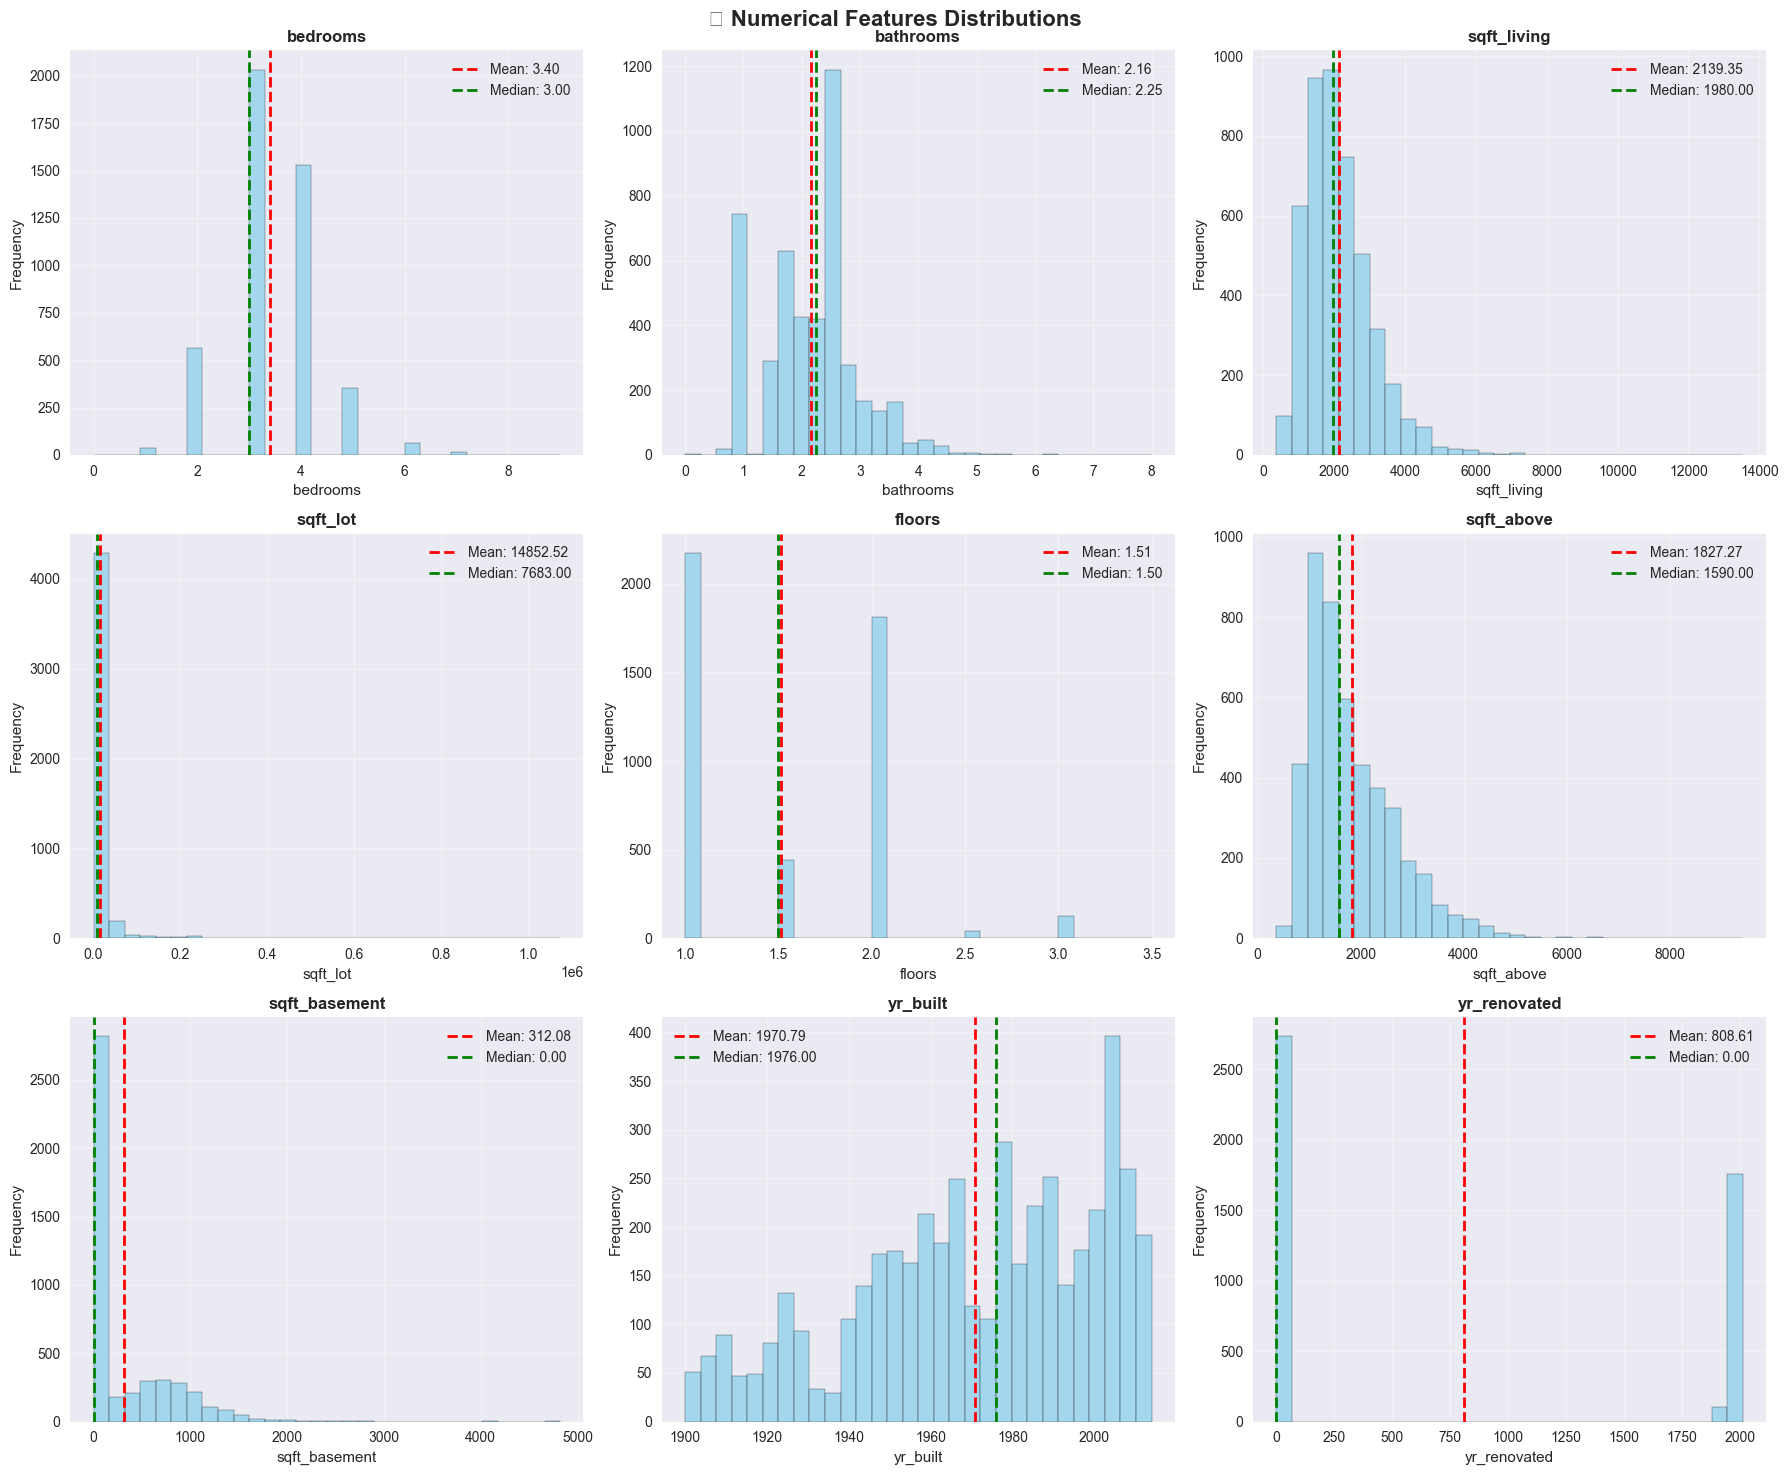

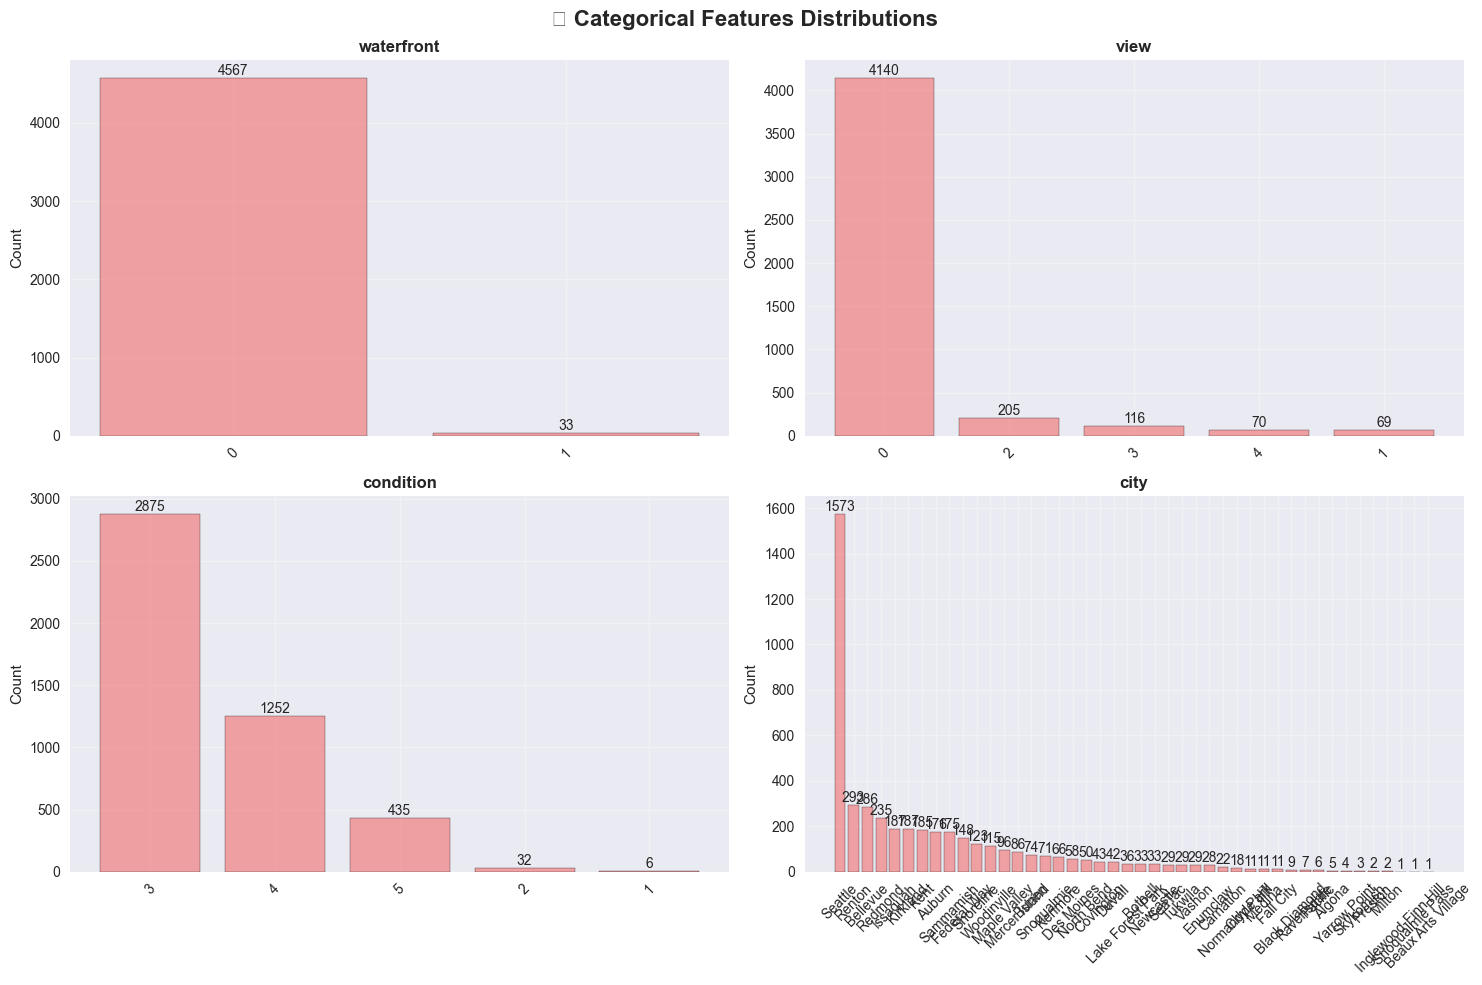

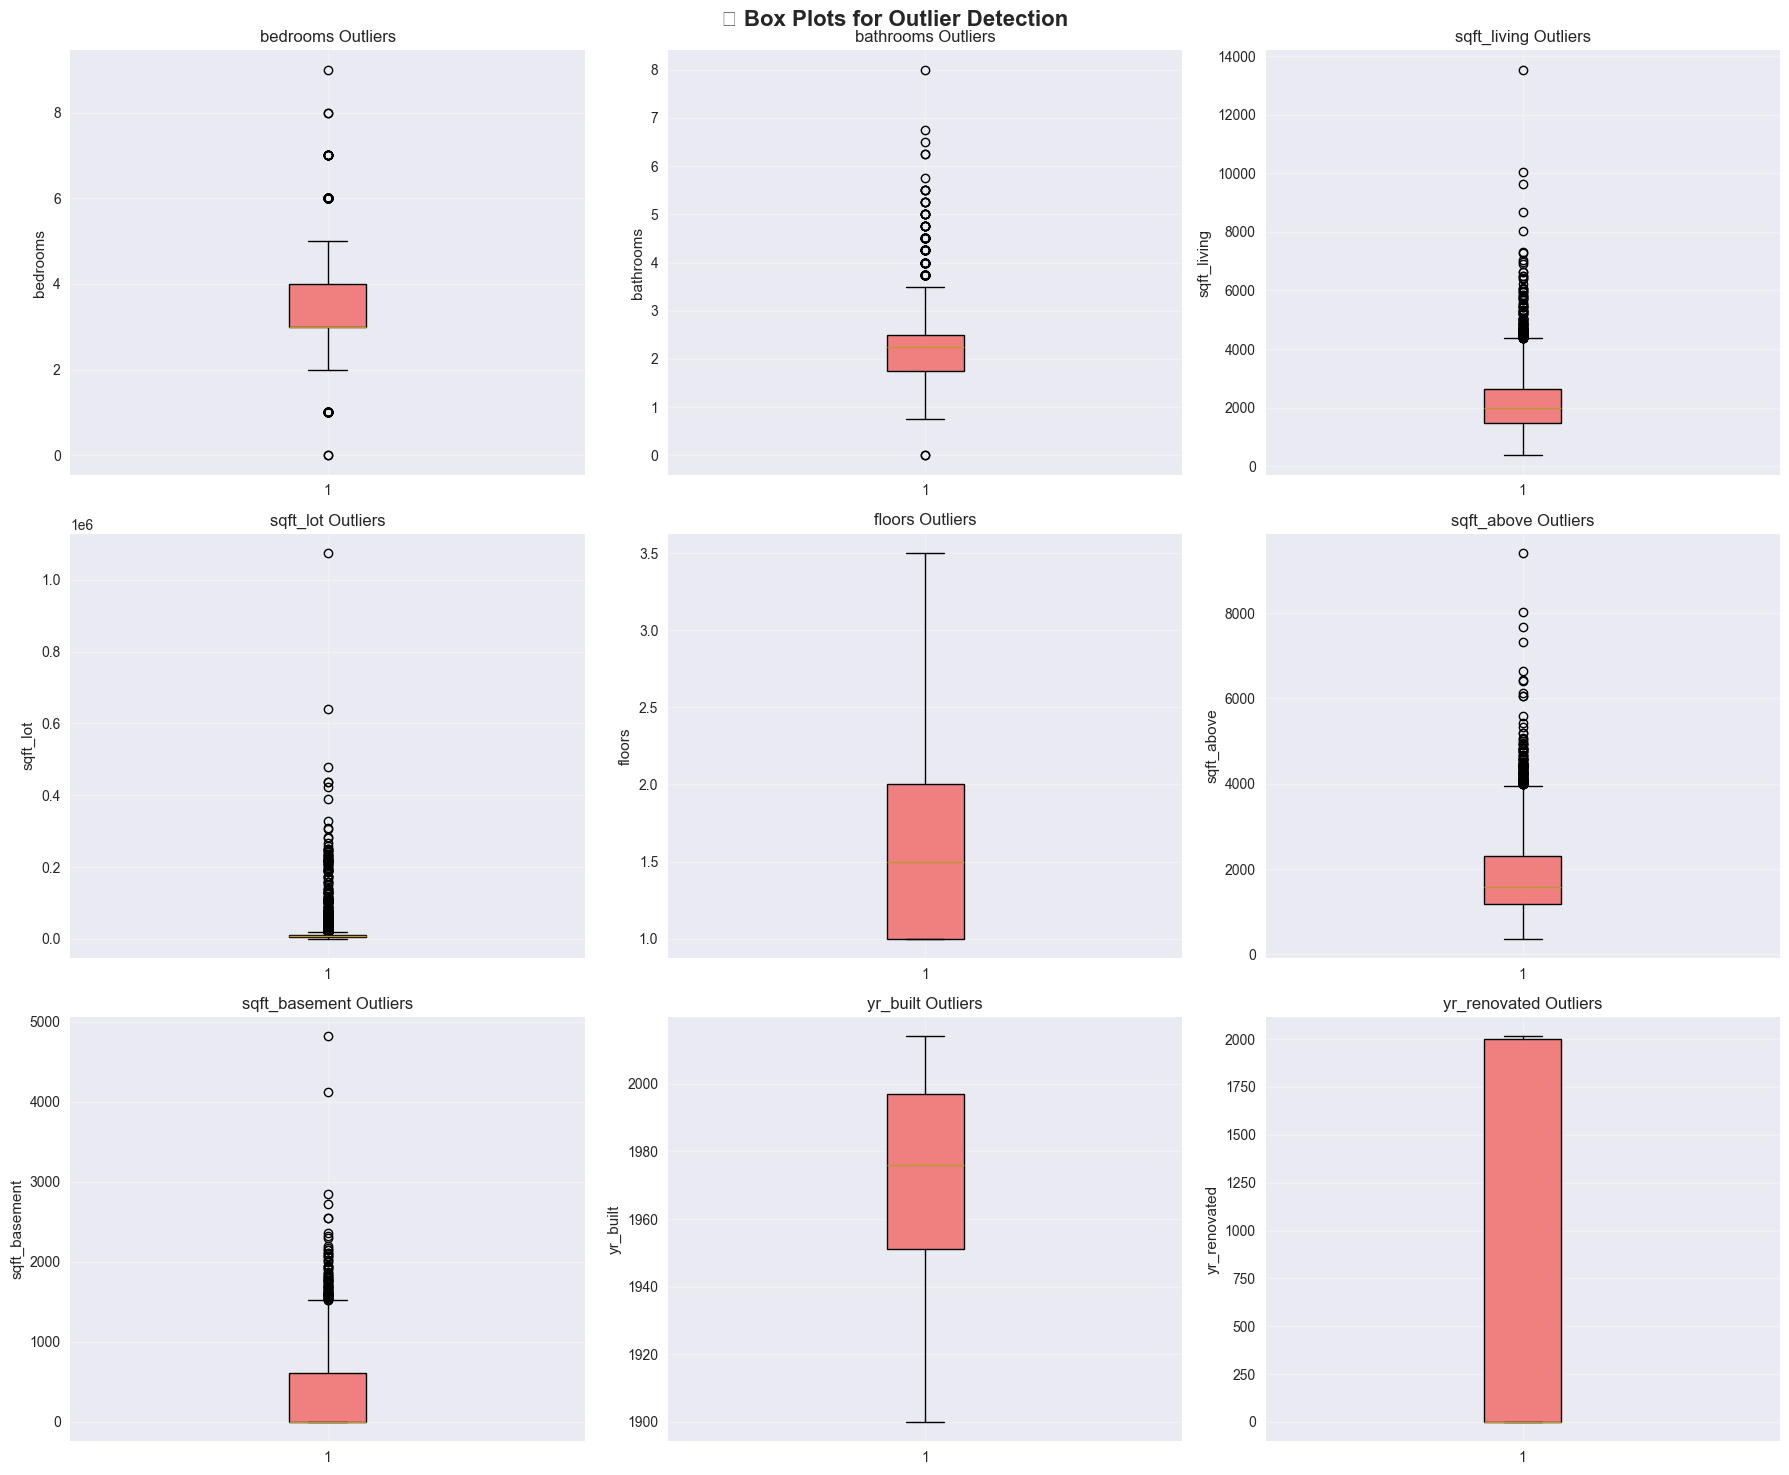


💡 UNIVARIATE INSIGHTS:
• bedrooms       : approximately symmetric (right)
• bathrooms      : moderately skewed (right)
• sqft_living    : highly skewed (right)
• sqft_lot       : highly skewed (right)
• floors         : moderately skewed (right)
• sqft_above     : highly skewed (right)
• sqft_basement  : highly skewed (right)
• yr_built       : moderately skewed (left)
• yr_renovated   : approximately symmetric (right)


In [40]:
# Univariate Analysis
print("📊 UNIVARIATE ANALYSIS")
print("=" * 30)

# Numerical features distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('📊 Numerical Features Distributions', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        # Histogram
        axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {df[feature].mean():.2f}')
        axes[i].axvline(df[feature].median(), color='green', linestyle='--', linewidth=2, 
                       label=f'Median: {df[feature].median():.2f}')
        axes[i].set_title(f'{feature}', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Categorical features distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Categorical Features Distributions', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        # Bar chart
        value_counts = df[feature].value_counts()
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                          color='lightcoral', alpha=0.7, edgecolor='black')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45)
        axes[i].set_title(f'{feature}', fontweight='bold')
        axes[i].set_ylabel('Count')
        axes[i].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, value_counts.values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                        str(value), ha='center', va='bottom')

# Remove empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('🚨 Box Plots for Outlier Detection', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        box_plot = axes[i].boxplot(df[feature], patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightcoral')
        axes[i].set_title(f'{feature} Outliers')
        axes[i].set_ylabel(feature)
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

print("\n💡 UNIVARIATE INSIGHTS:")
print("=" * 30)
for feature in numerical_features:
    skew = df[feature].skew()
    if abs(skew) > 1:
        skew_type = "highly skewed"
    elif abs(skew) > 0.5:
        skew_type = "moderately skewed"
    else:
        skew_type = "approximately symmetric"
    
    direction = "right" if skew > 0 else "left" if skew < 0 else "symmetric"
    print(f"• {feature:15s}: {skew_type} ({direction})")


📊 UNIVARIATE ANALYSIS


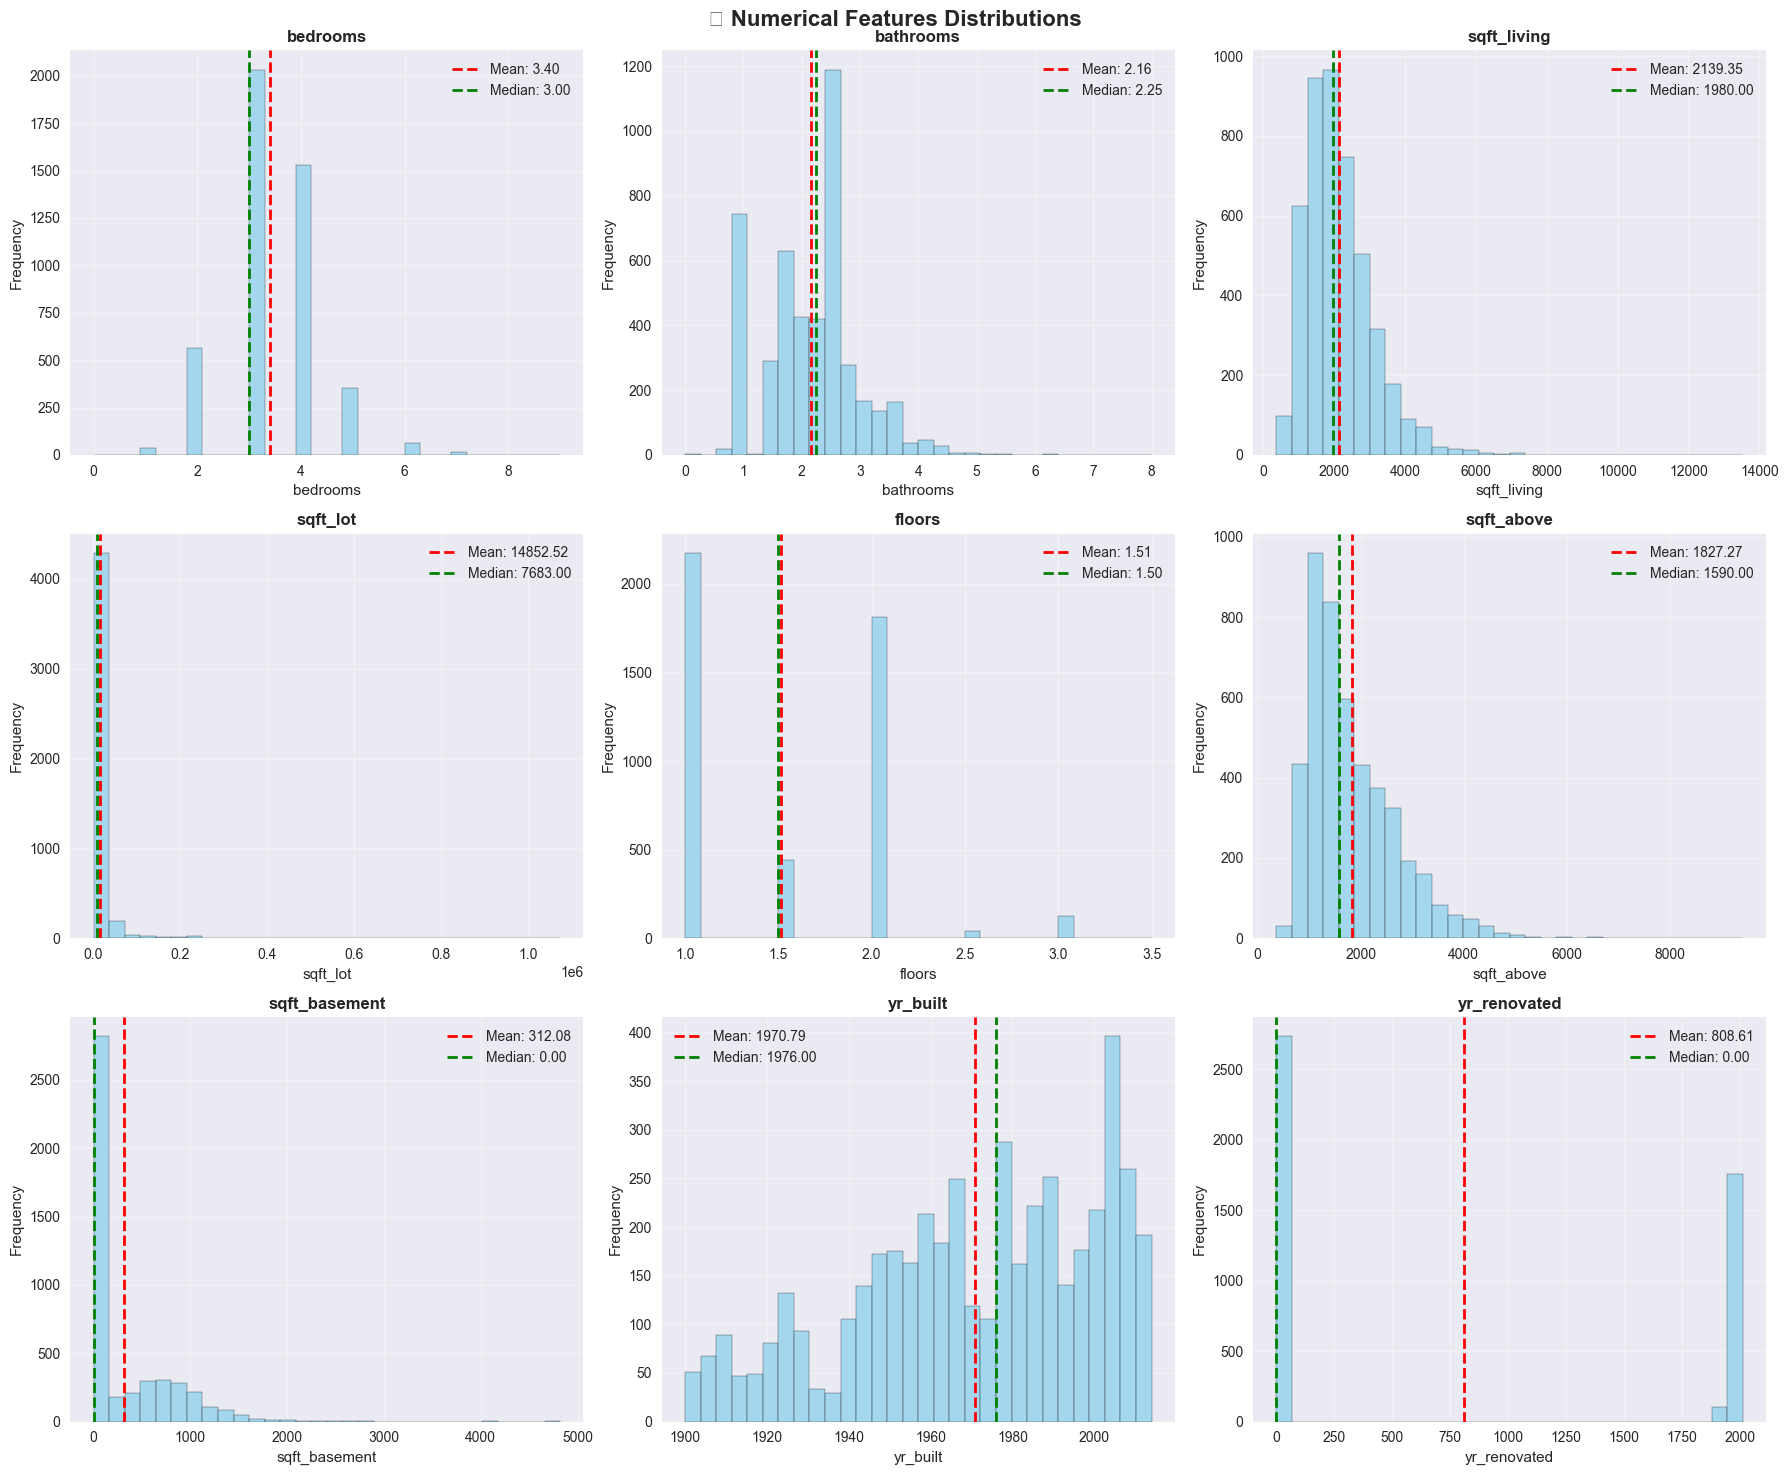

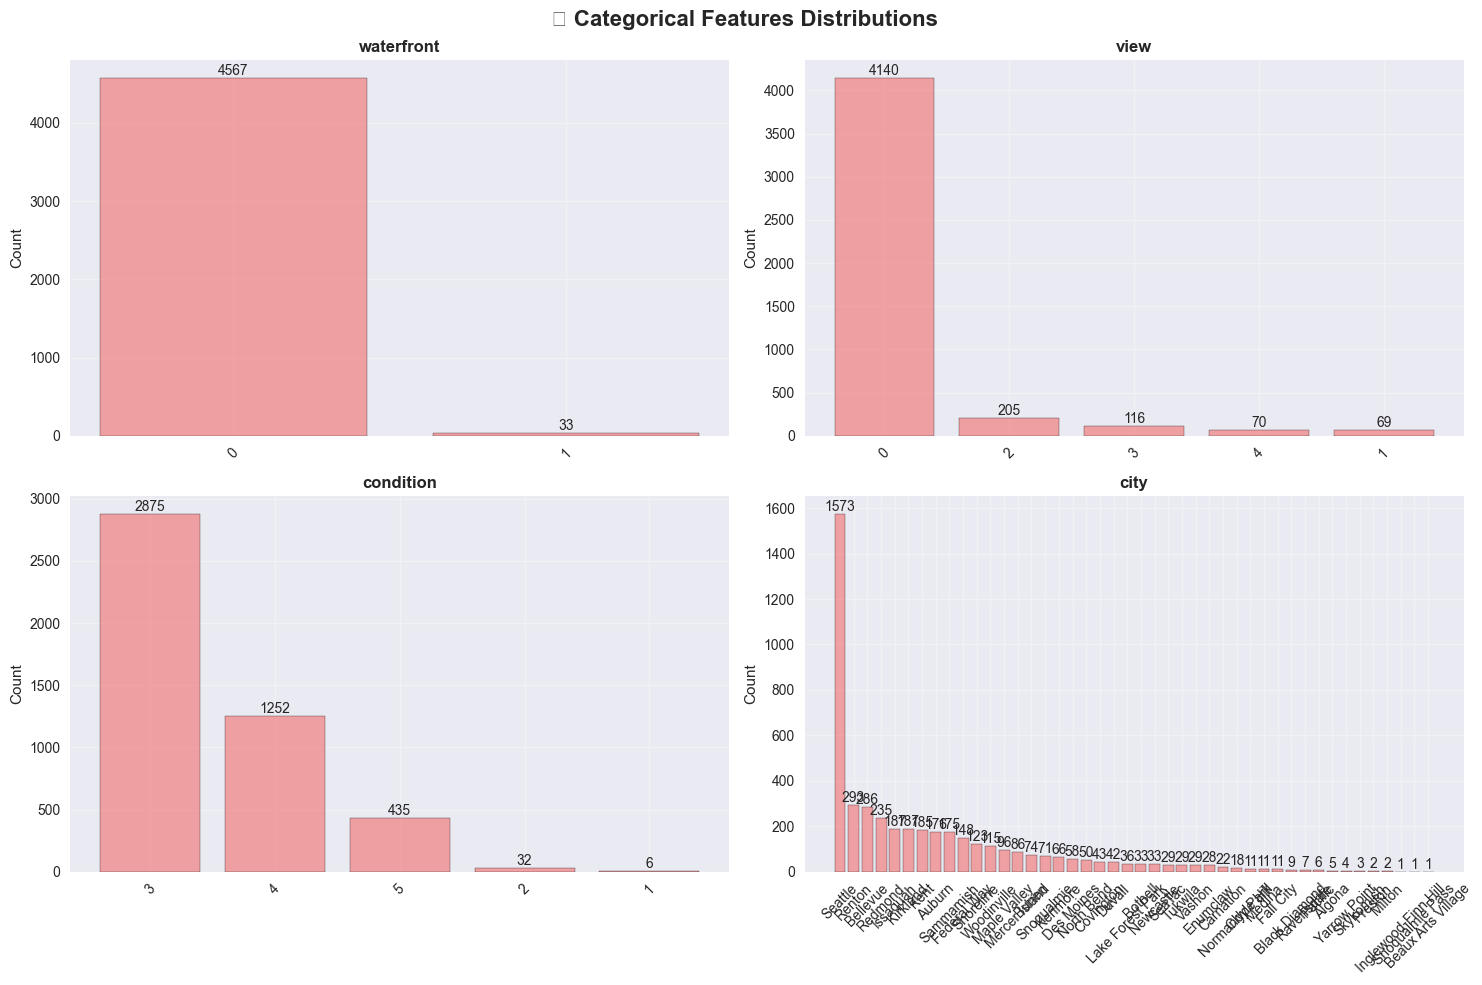

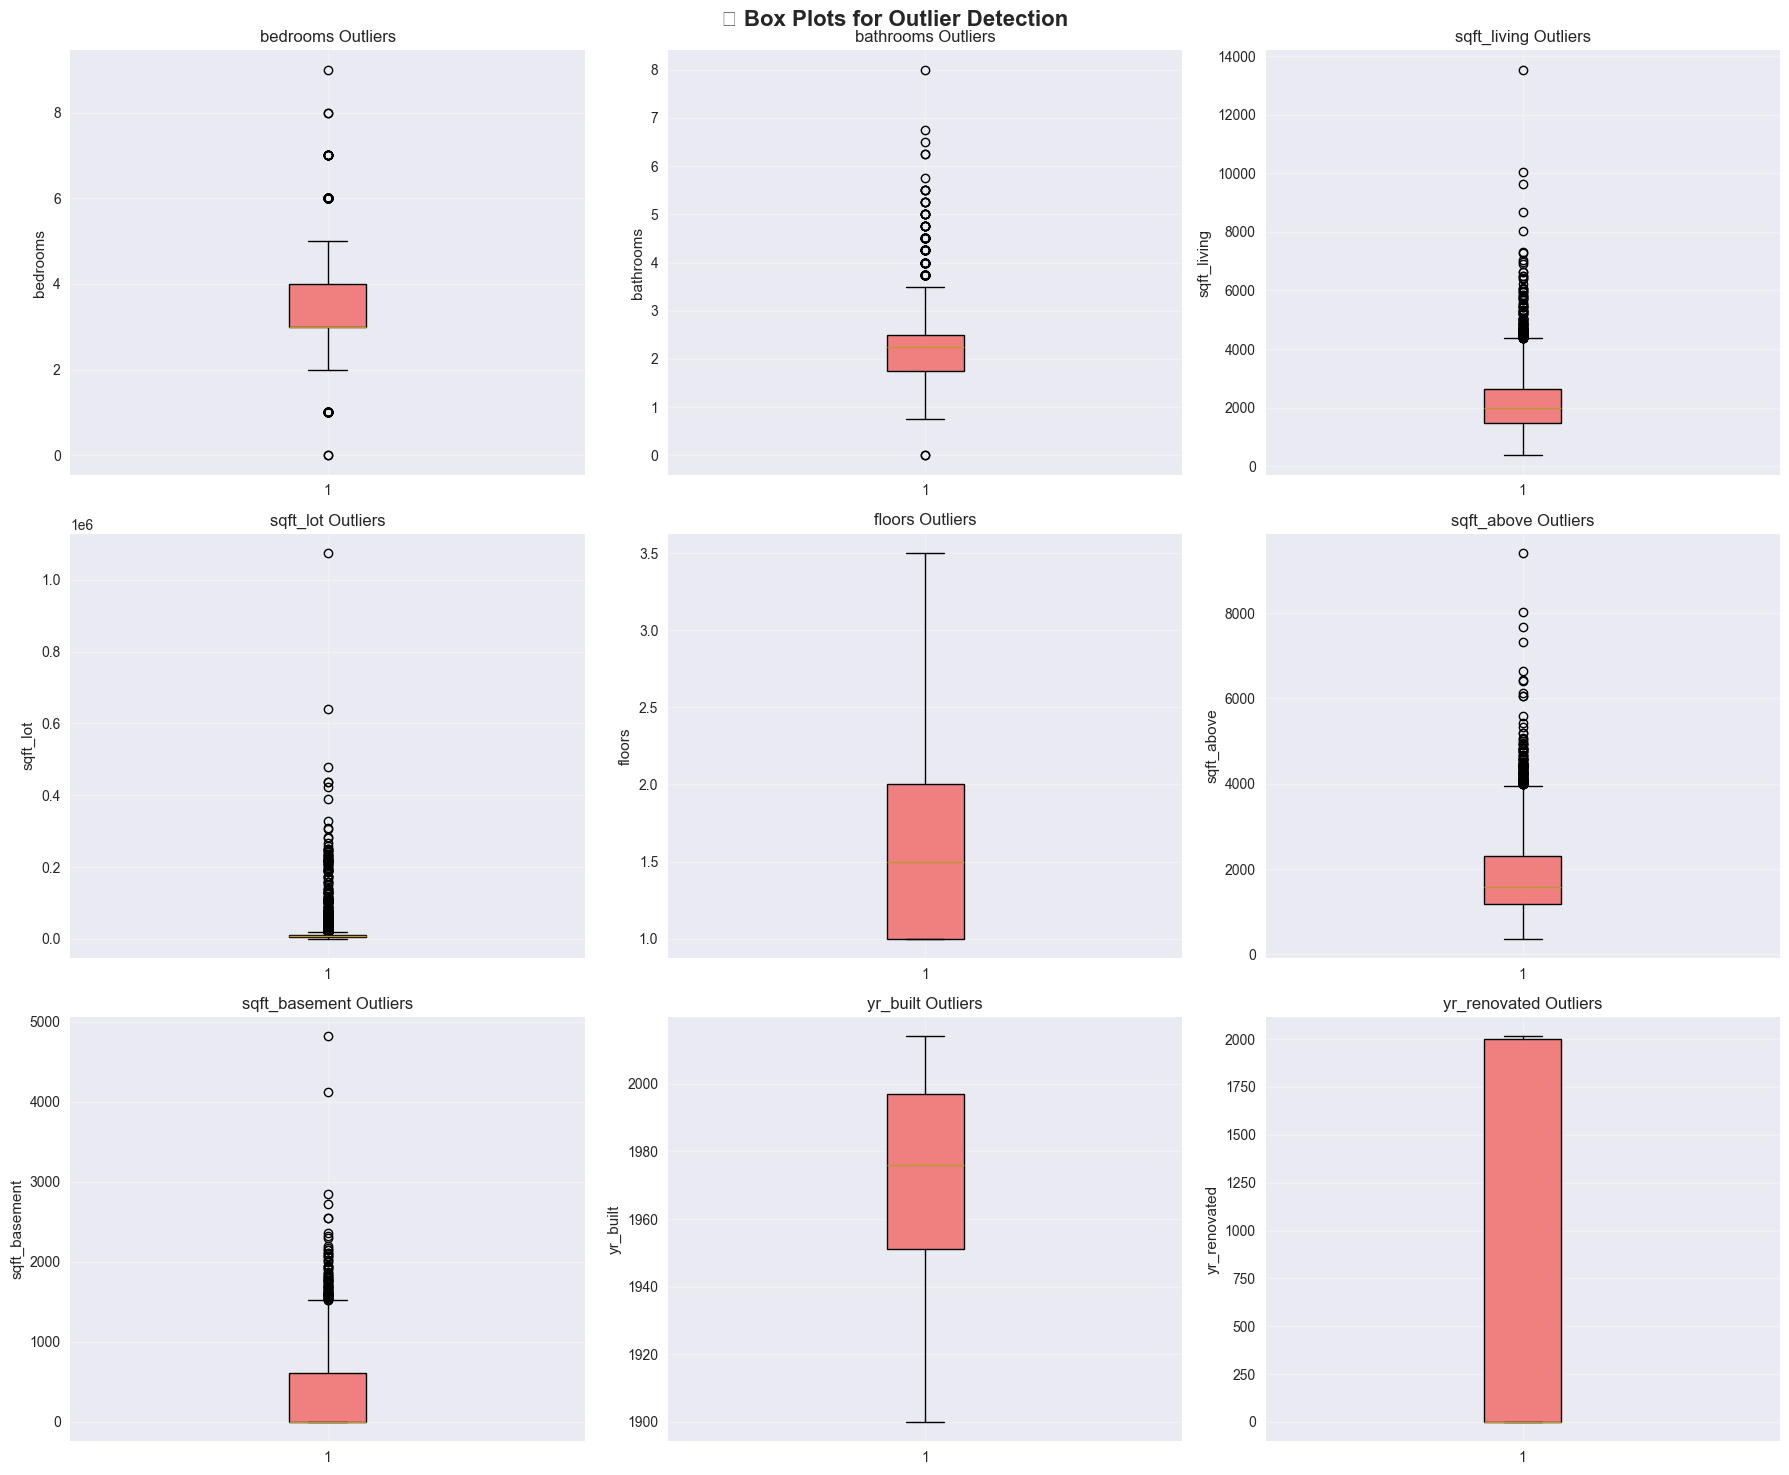


💡 UNIVARIATE INSIGHTS:
• bedrooms       : approximately symmetric (right)
• bathrooms      : moderately skewed (right)
• sqft_living    : highly skewed (right)
• sqft_lot       : highly skewed (right)
• floors         : moderately skewed (right)
• sqft_above     : highly skewed (right)
• sqft_basement  : highly skewed (right)
• yr_built       : moderately skewed (left)
• yr_renovated   : approximately symmetric (right)


In [39]:
# Univariate Analysis
print("📊 UNIVARIATE ANALYSIS")
print("=" * 30)

# Numerical features distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('📊 Numerical Features Distributions', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        # Histogram
        axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {df[feature].mean():.2f}')
        axes[i].axvline(df[feature].median(), color='green', linestyle='--', linewidth=2, 
                       label=f'Median: {df[feature].median():.2f}')
        axes[i].set_title(f'{feature}', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Categorical features distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Categorical Features Distributions', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        # Bar chart
        value_counts = df[feature].value_counts()
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                          color='lightcoral', alpha=0.7, edgecolor='black')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45)
        axes[i].set_title(f'{feature}', fontweight='bold')
        axes[i].set_ylabel('Count')
        axes[i].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, value_counts.values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                        str(value), ha='center', va='bottom')

# Remove empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('🚨 Box Plots for Outlier Detection', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        box_plot = axes[i].boxplot(df[feature], patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightcoral')
        axes[i].set_title(f'{feature} Outliers')
        axes[i].set_ylabel(feature)
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

print("\n💡 UNIVARIATE INSIGHTS:")
print("=" * 30)
for feature in numerical_features:
    skew = df[feature].skew()
    if abs(skew) > 1:
        skew_type = "highly skewed"
    elif abs(skew) > 0.5:
        skew_type = "moderately skewed"
    else:
        skew_type = "approximately symmetric"
    
    direction = "right" if skew > 0 else "left" if skew < 0 else "symmetric"
    print(f"• {feature:15s}: {skew_type} ({direction})")
